In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import math
import subprocess
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
import time as time
import random 
from scipy import sparse
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
train.shape

(49352, 15)

In [4]:
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude                        manager_id  \
4    40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4   
6    40.7513     7092344   -73.9722  955db33477af4f40004820b4aed804a0   
9    40.7575     7158677   -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   40.7439     7225292   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  
4       145 Borinquen Place         medium  
6             230 East 44th            low  
9      405 East 56th Street         medium  
10  792 Metropolitan Avenue         medium  
15     340 East 34th Street            low

In [5]:
train.describe()

bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06

In [6]:
train.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [7]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [8]:
#list of all numeric data
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names

['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']

Display the distinct values for this attributes manager_id, building_id, display_address, street_address

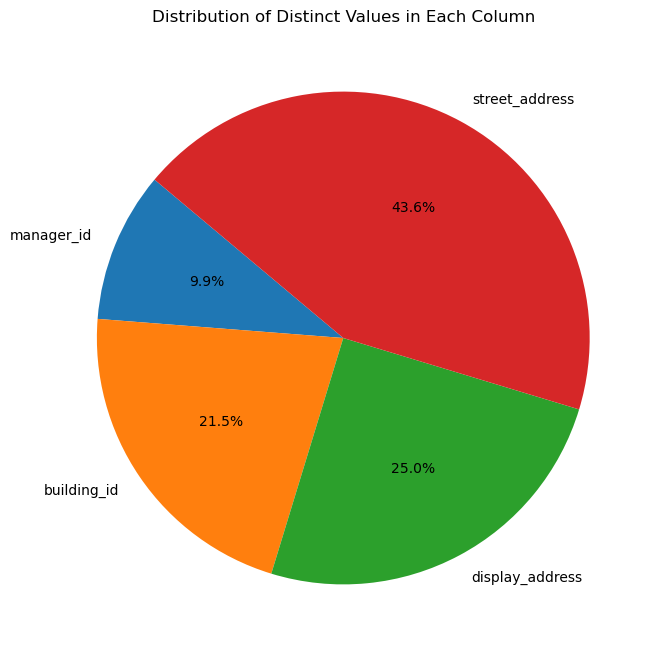

In [9]:
counts = pd.DataFrame({'name': ['manager_id', 'building_id', 'display_address', 'street_address']})
counts['distinct'] = counts['name'].apply(lambda name: len(set(list(train[name]))))
counts
plt.figure(figsize=(8, 8))
plt.pie(counts['distinct'], labels=counts['name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Distinct Values in Each Column')
plt.show()

# visualization

### visualization for bedroom

In [10]:
print(train['bedrooms'].value_counts())

bedrooms
1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: count, dtype: int64


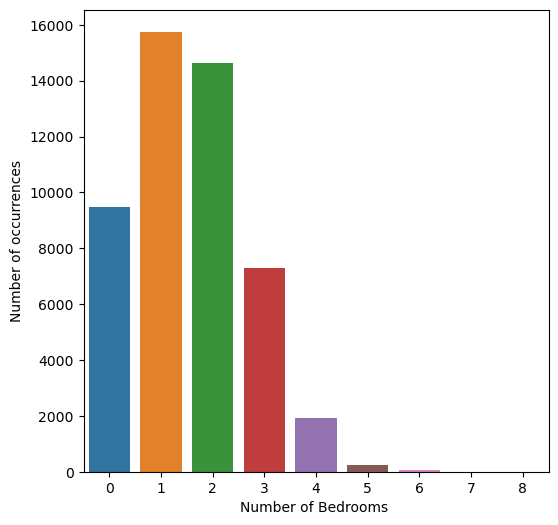

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='bedrooms', data=train)
plt.xlabel('Number of Bedrooms ')
plt.ylabel('Number of occurrences')
plt.show()

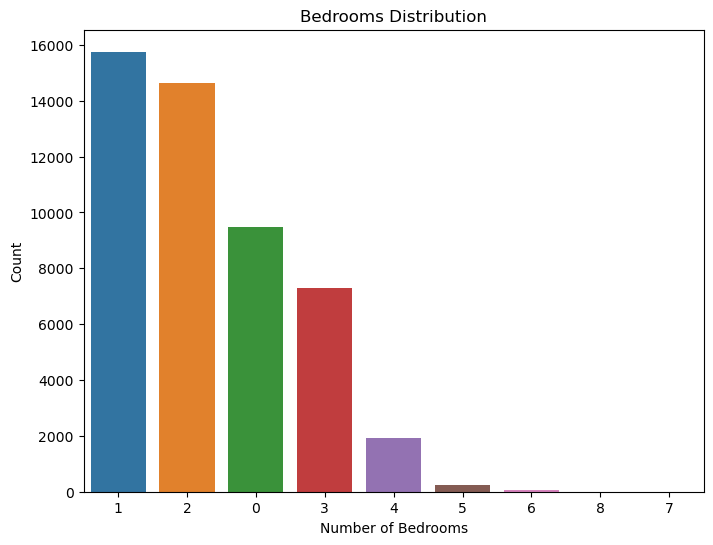

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='bedrooms', order=train['bedrooms'].value_counts().index)
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Number of occurrences')

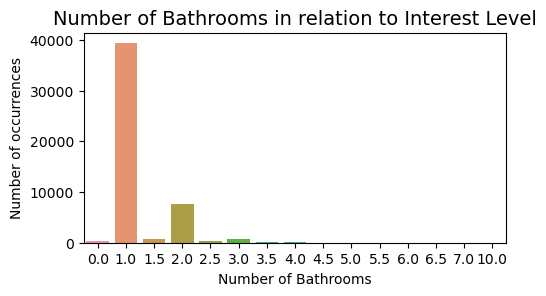

In [13]:
plt.figure(figsize=(12, 6))
# Number of Bathrooms
plt.subplot(221)
plt.title('Number of Bathrooms in relation to Interest Level', fontsize=14)
sns.countplot(data=train, x='bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of occurrences')


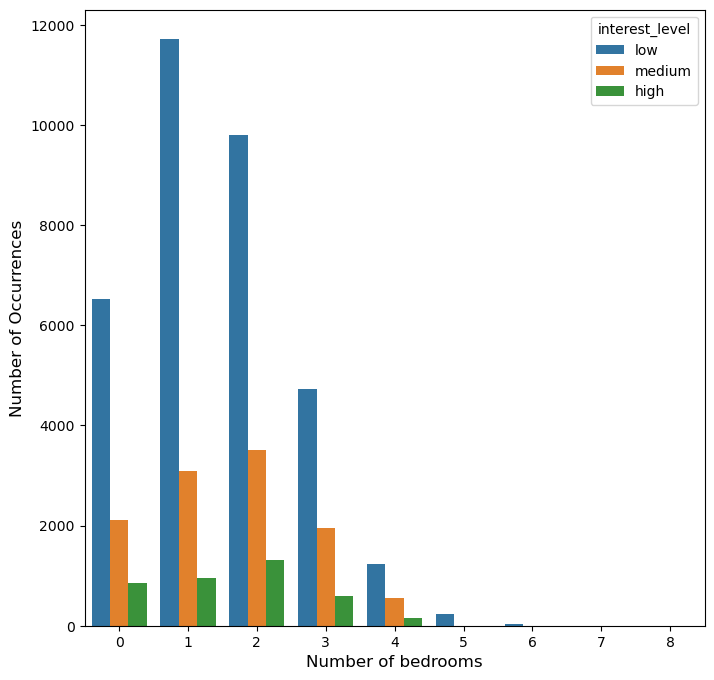

In [14]:
plt.figure(figsize=(8, 8))
sns.countplot(x='bedrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.show()

### visualization for bathroom

In [15]:
print(train['bathrooms'].value_counts())

bathrooms
1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: count, dtype: int64


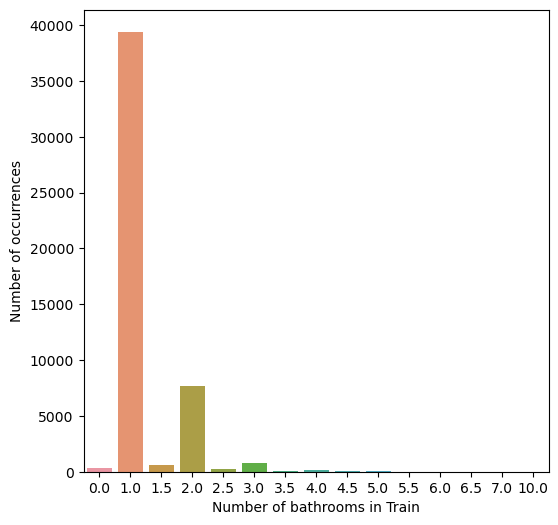

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(x='bathrooms', data=train)
plt.xlabel('Number of bathrooms in Train')
plt.ylabel('Number of occurrences')
plt.show()

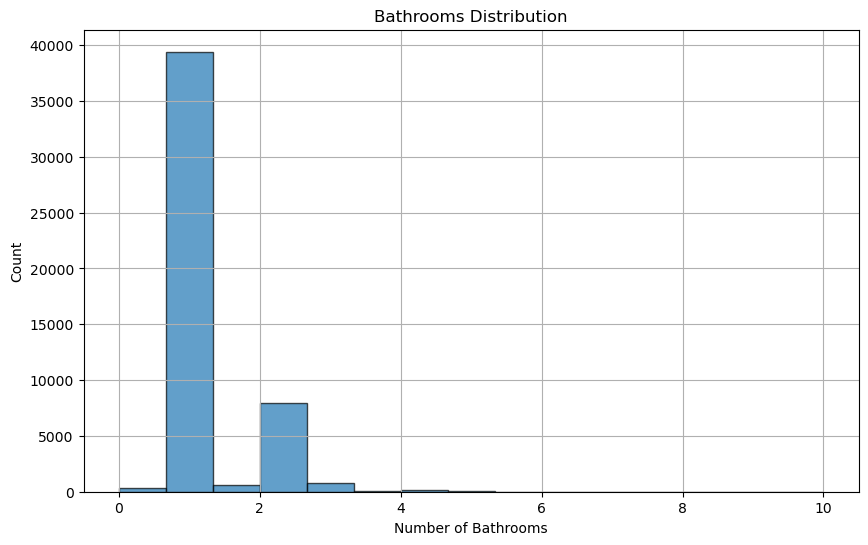

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(train['bathrooms'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()

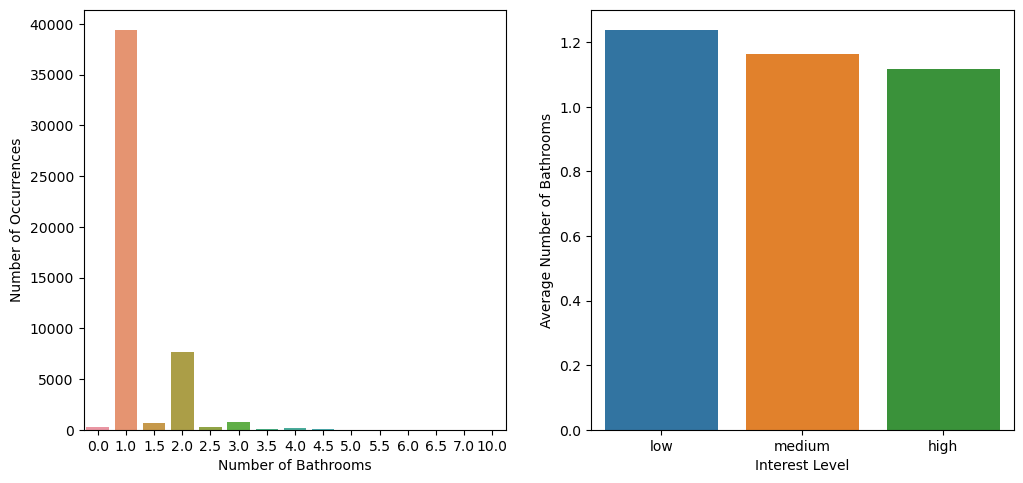

In [18]:
fig = plt.figure(figsize=(12, 12))

# Count plot for 'bathrooms'
plt.subplot(221)
sns.countplot(x='bathrooms', data=train)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Occurrences')

# Bar plot for 'interest_level' vs. 'bathrooms'
plt.subplot(222)
sns.barplot(x='interest_level', y='bathrooms', data=train, order=['low', 'medium', 'high'], ci=None)
plt.xlabel('Interest Level')
plt.ylabel('Average Number of Bathrooms')

plt.show()

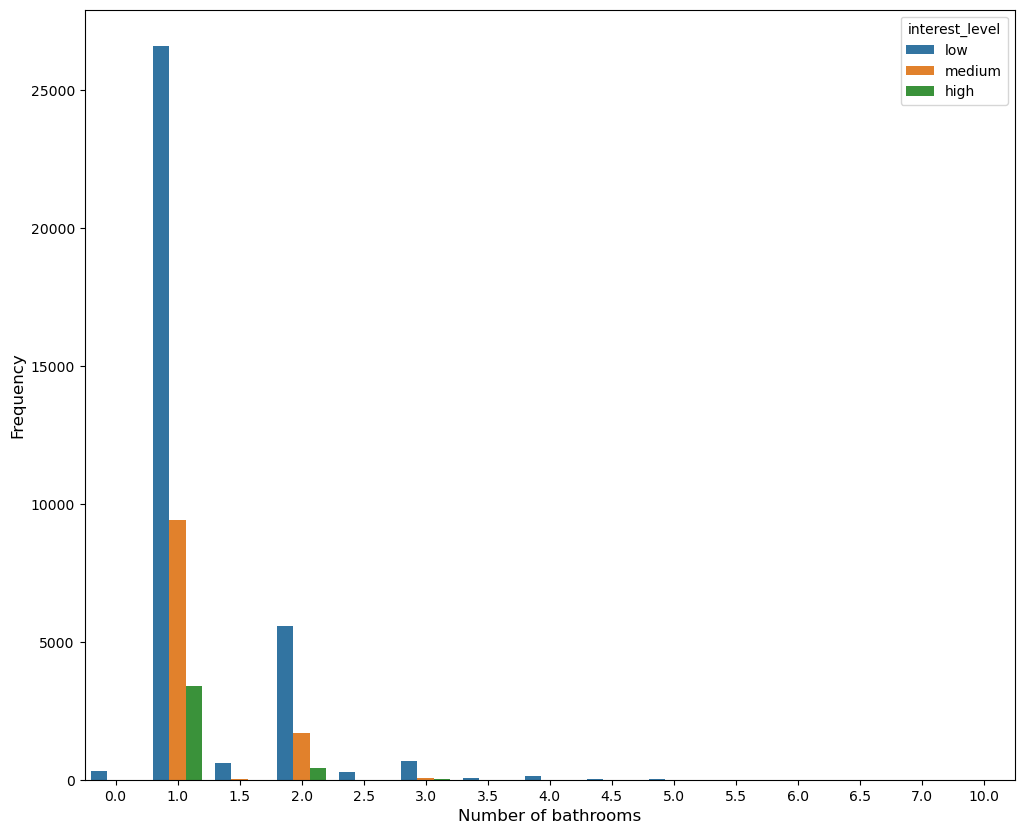

In [19]:
plt.figure(figsize=(12, 10))
sns.countplot(x='bathrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.show()

### Removing the outliers 

In [20]:
DatabeforeremovingOutliers = train.shape
DatabeforeremovingOutliers

(49352, 15)

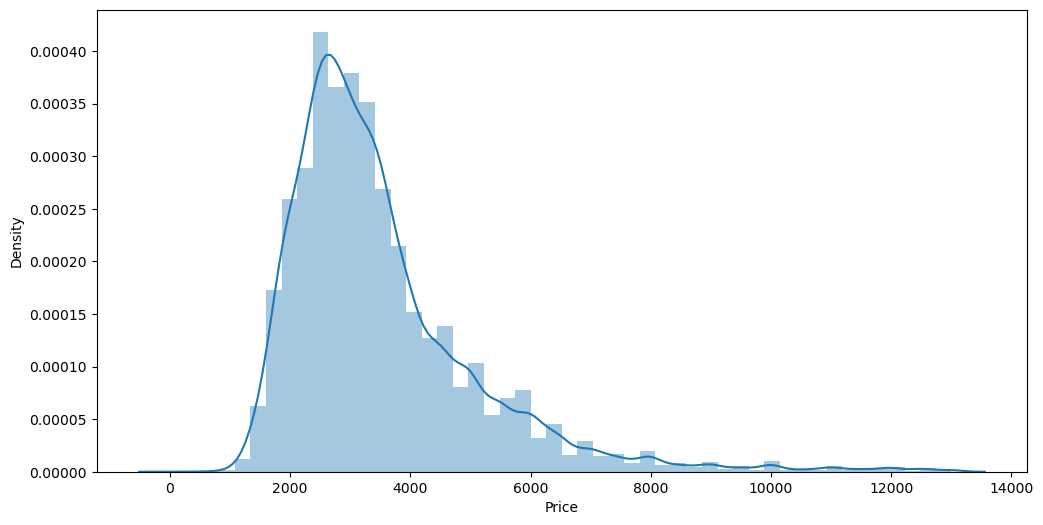

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers based on quantile
quantile_value = 0.99  
train = train[train['price'] <= train['price'].quantile(quantile_value)]
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['price'], ax=ax)
ax.set_xlabel('Price')
ax.set_ylabel('Density')
plt.show()

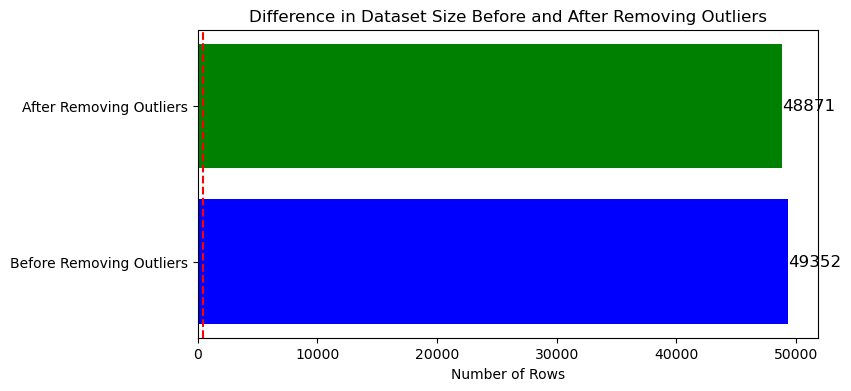

In [22]:
data_before_removing_outliers = DatabeforeremovingOutliers[0]
data_after_removing_outliers = train.shape[0]
difference = data_before_removing_outliers - data_after_removing_outliers

# Create a horizontal bar plot with annotations
plt.figure(figsize=(8, 4))
bars = plt.barh(['Before Removing Outliers', 'After Removing Outliers'], [data_before_removing_outliers, data_after_removing_outliers], color=['blue', 'green'])
plt.xlabel('Number of Rows')
plt.title('Difference in Dataset Size Before and After Removing Outliers')

# Add annotations to display the difference
for bar, v in zip(bars, [data_before_removing_outliers, data_after_removing_outliers]):
    plt.text(v, bar.get_y() + bar.get_height()/2, str(v), color='black', va='center', fontsize=12)

# Add a line to connect the annotations
plt.axvline(x=difference, color='red', linestyle='--')
plt.show()

#### visualization the interest level 

In [23]:
Interest_value_counts = train['interest_level'].value_counts()

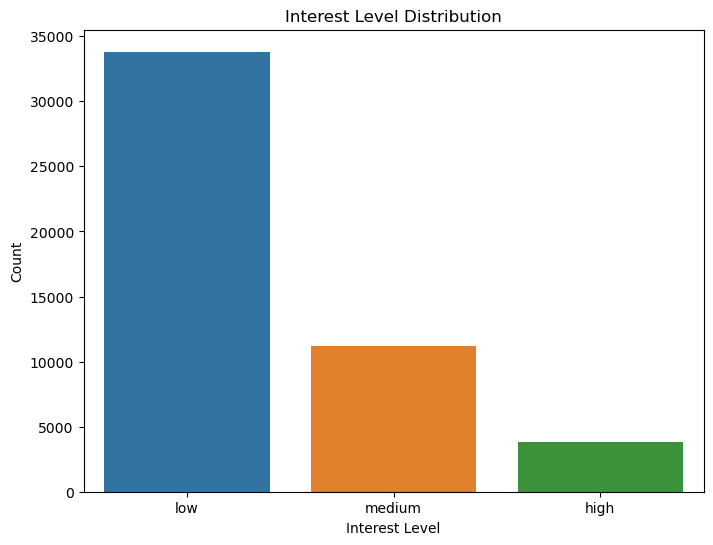

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='interest_level', order=['low', 'medium', 'high'])
plt.title('Interest Level Distribution')
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.show()

In [25]:
percent_low = 100 * train['interest_level'].value_counts()['low'] / train['interest_level'].value_counts().sum()
percent_medium = 100 * train['interest_level'].value_counts()['medium'] / train['interest_level'].value_counts().sum()
percent_high = 100 * train['interest_level'].value_counts()['high'] / train['interest_level'].value_counts().sum()
print('low-->', percent_low, '%')
print('medium-->', percent_medium, '%')
print('high-->', percent_high, '%')

low--> 69.18417875631765 %
medium--> 22.964539297333797 %
high--> 7.85128194634855 %


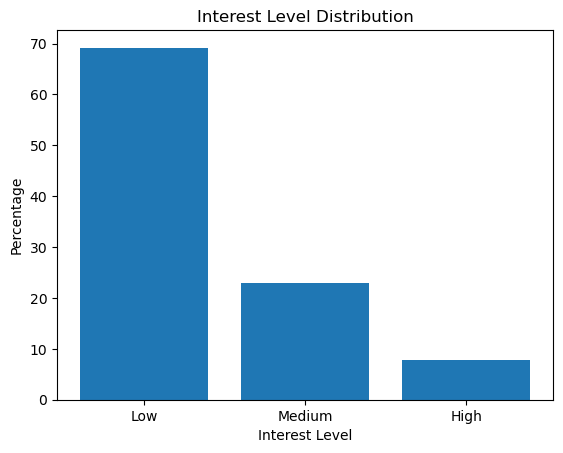

In [26]:
interest_levels = ['Low', 'Medium', 'High']
percentages = [percent_low, percent_medium, percent_high]
plt.bar(interest_levels, percentages)
plt.xlabel('Interest Level')
plt.ylabel('Percentage')
plt.title('Interest Level Distribution')
plt.show()


#### Display the average price based on the interest level

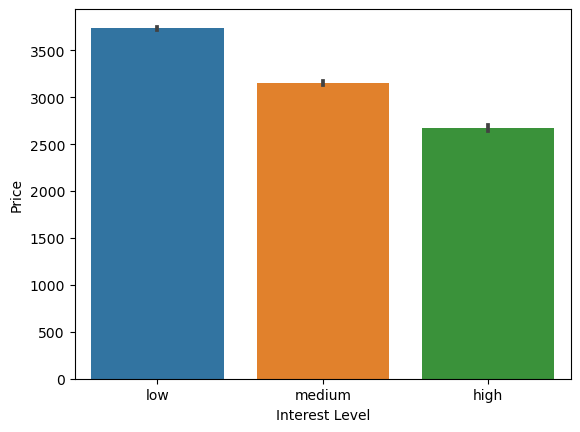

In [27]:
# Barplot for average price by interest level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=train, )
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.show()

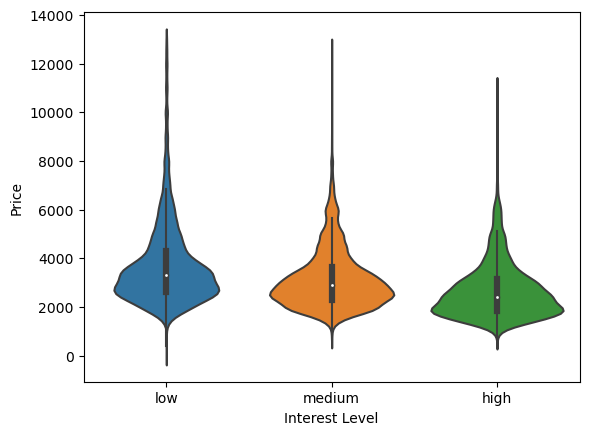

In [28]:
# Violin plots for price by interest level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=train, )
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Price')

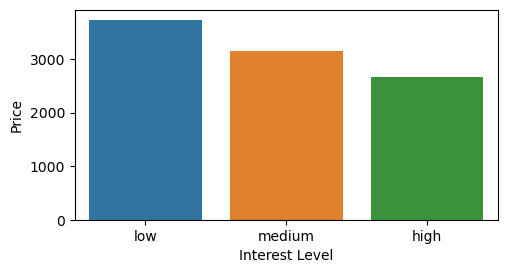

In [29]:
plt.figure(figsize=(12, 6))

# Barplot for average price by interest level
plt.subplot(223)
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train, ci=None)
plt.xlabel('Interest Level')
plt.ylabel('Price')


#### Based on number of Bathroom comparing with interest level 

In [30]:
baths=pd.crosstab(train.bathrooms, train.interest_level, margins=True)
baths['low interest (%)']=100*baths['low']/baths['All']
baths['medium interest (%)']=100*baths['medium']/baths['All']
baths['high interest (%)']=100*baths['high']/baths['All']
baths
#baths.drop(['high','low','medium','All'],axis=1)

interest_level  high    low  medium    All  low interest (%)  \
bathrooms                                                      
0.0                1    299       6    306         97.712418   
1.0             3412  26564    9428  39404         67.414476   
1.5                0    605      40    645         93.798450   
2.0              407   5496    1685   7588         72.430153   
2.5                0    230       3    233         98.712446   
3.0               14    505      56    575         87.826087   
3.5                0     33       0     33        100.000000   
4.0                3     76       5     84         90.476190   
4.5                0      1       0      1        100.000000   
5.0                0      1       0      1        100.000000   
10.0               0      1       0      1        100.000000   
All             3837  33811   11223  48871         69.184179   

interest_level  medium interest (%)  high interest (%)  
bathrooms                                               
0.0                        1.960784           0.326797  
1.0                       23.926505           8.659019  
1.5                        6.201550           0.000000  
2.0                       22.206115           5.363732  
2.5                        1.287554           0.000000  
3.0                        9.739130           2.434783  
3.5                        0.000000           0.000000  
4.0                        5.952381           3.571429  
4.5                        0.000000           0.000000  
5.0                        0.000000           0.000000  
10.0                       0.000000           0.000000  
All                       22.964539           7.851282

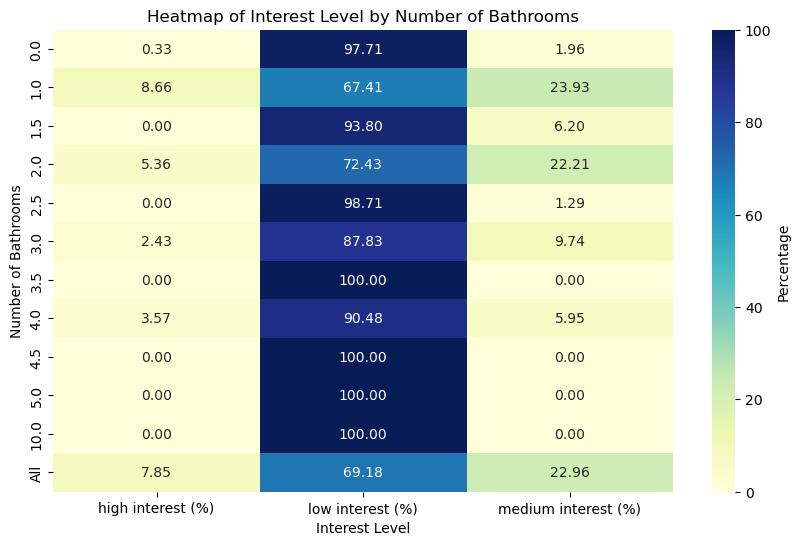

In [31]:
data = baths.pivot_table(values=['low interest (%)', 'medium interest (%)', 'high interest (%)'], index='bathrooms')
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})

plt.xlabel('Interest Level')
plt.ylabel('Number of Bathrooms')
plt.title('Heatmap of Interest Level by Number of Bathrooms')

plt.show()

#### 1 bathroom comparison with the interest level

<Axes: xlabel='bedrooms'>

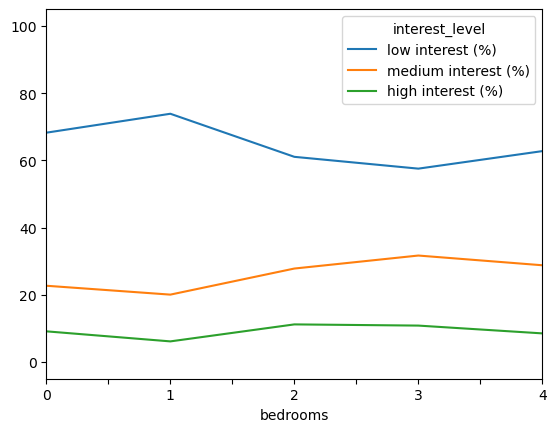

In [32]:
df_entire_1bath=train[train['bathrooms']==1]
beds1bth=pd.crosstab(df_entire_1bath.bedrooms, train.interest_level, margins=True)
beds1bth['low interest (%)']=100*beds1bth['low']/beds1bth['All']
beds1bth['medium interest (%)']=100*beds1bth['medium']/beds1bth['All']
beds1bth['high interest (%)']=100*beds1bth['high']/beds1bth['All']
#print(beds1bth)
beds1bth
beds1bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))


#### 2 bathroom comparison with the interest level

<Axes: xlabel='bedrooms'>

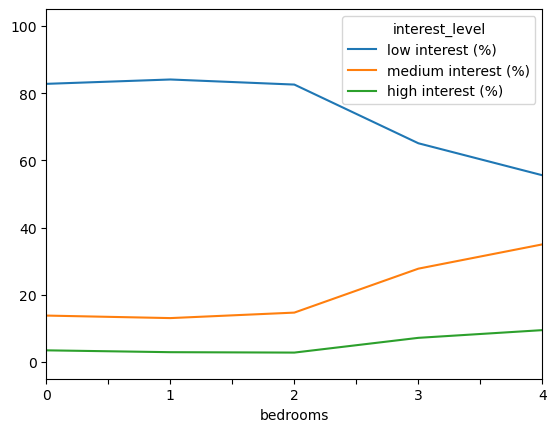

In [33]:
df_entire_2bath=train[train['bathrooms']==2]
beds2bth=pd.crosstab(df_entire_2bath.bedrooms, train.interest_level, margins=True)
beds2bth['low interest (%)']=100*beds2bth['low']/beds2bth['All']
beds2bth['medium interest (%)']=100*beds2bth['medium']/beds2bth['All']
beds2bth['high interest (%)']=100*beds2bth['high']/beds2bth['All']
beds2bth
#print(beds2bth)
beds2bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))

#### comparing the price with other attributes for visualization

In [34]:
# Calculate Price / bedrooms
price_per_bedroom = train['price'] / train['bedrooms']

# Calculate Price / (bedrooms + bathrooms)
price_per_room = train['price'] / (train['bedrooms'] + train['bathrooms'])

# Replace infinity with median - due to occurrence of bedroom = 0 or bathroom = 0
price_per_bedroom = price_per_bedroom.replace([np.inf, -np.inf], price_per_bedroom.median())
price_per_room = price_per_room.replace([np.inf, -np.inf], price_per_room.median())


#### Pair Plot to visualize the price, latitude, longitude

Text(0.5, 0.98, 'Pair plot for rental listing dataset')

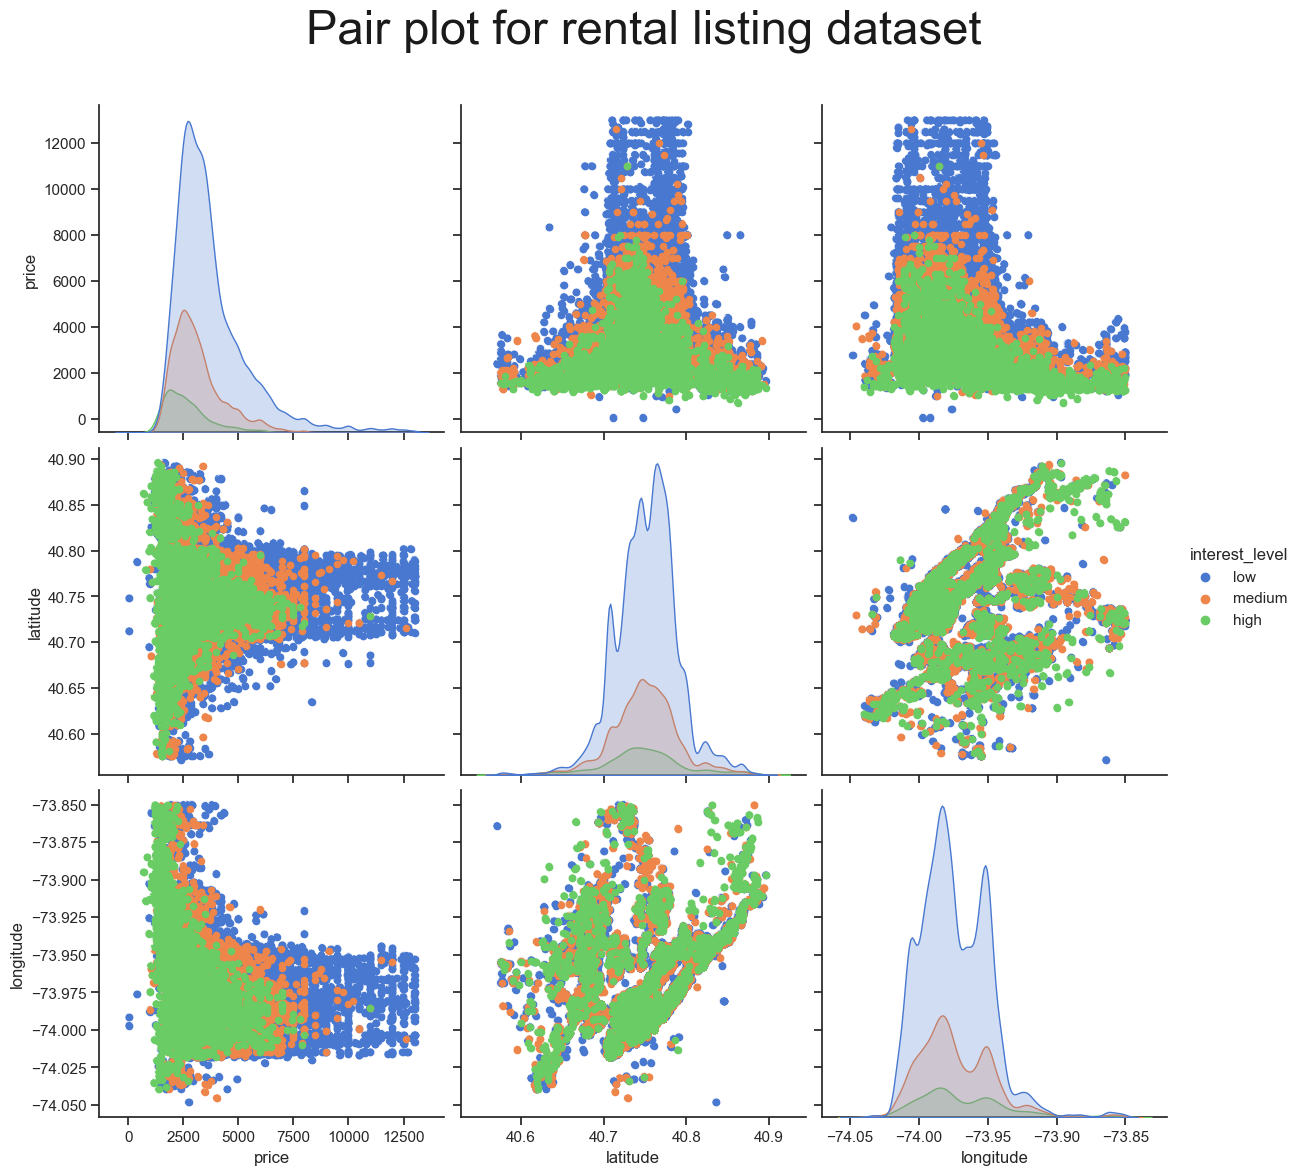

In [35]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="ticks")

# Change df_entire to train
train_ss = train[(train['price'] > 0) & (train['price'] < 20000) & (train['latitude'] < 40.9) & (train['latitude'] > 40.55) & (train['longitude'] < -73.85) & (train['longitude'] > -74.05)]

g = sns.pairplot(train_ss, palette="muted", markers='o', vars=['price', 'latitude', 'longitude'], height=4, hue='interest_level', hue_order=['low', 'medium', 'high'])
g = g.map_offdiag(plt.scatter, s=20)

# Remove the top and right lines in the graph
sns.despine()

# Additional adjustments for appearance
plt.subplots_adjust(top=0.9)

# Set the title of the graph
g.fig.suptitle('Pair plot for rental listing dataset', fontsize=34, color="k", alpha=1)


# Feature Engneering

#### Exploring manager_id (High Cardinality Data)

Exploring manager_id (High Cardinality Data)
First we check manager_id column and see that there are 3481 unique values there.
Count the number of listings by manager_id, and whether those listings belong to "high", "medium", or "low" interest. Cast as dataframe.
Sort dataframe by number of listings (regardless of interest) and by number of high interest level listings, and see that some manager_ids can be very informative in interest levels.
I also explored creating a Manager Skill feature.

In [36]:
train["manager_id"].describe()

count                                48871
unique                                3454
top       e6472c7237327dd3903b3d6f6a94515a
freq                                  2523
Name: manager_id, dtype: object

In [37]:
managerDF = train.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
managerDF["sum"]=managerDF.sum(axis=1)
managerDF.head()

interest_level                    high   low  medium   sum
manager_id                                                
0000abd7518b94c35a90d64b56fbf3e6   0.0   4.0     8.0  12.0
001ce808ce1720e24a9510e014c69707   0.0  10.0     0.0  10.0
003fc4e9a70053082f131b1054966aaf   0.0   1.0     0.0   1.0
00607a02f6efd9c6c7c588826e471ee9   0.0   0.0     2.0   2.0
00995ff28d79127ed2dca8320e9e7d09   0.0   2.0     1.0   3.0

In [38]:
# sort by number of listings ("sum")
managerDF_sortby_sum = managerDF.sort_values(by="sum", ascending=0)
managerDF_sortby_sum.head(10)

interest_level                     high     low  medium     sum
manager_id                                                     
e6472c7237327dd3903b3d6f6a94515a  172.0  1729.0   622.0  2523.0
6e5c10246156ae5bdcd9b487ca99d96a    4.0   633.0    63.0   700.0
8f5a9c893f6d602f4953fcc0b8e6e9b4    1.0   404.0     4.0   409.0
62b685cc0d876c3a1a51d63a0d6a8082    0.0   399.0     0.0   399.0
cb87dadbca78fad02b388dc9e8f25a5b   55.0   132.0   183.0   370.0
9df32cb8dda19d3222d66e69e258616b   14.0   272.0    43.0   329.0
2aa9bfa5f67ed9997ea341dee8a3a271   38.0   163.0   115.0   316.0
b7de4cb395920136663132057fa89d84    0.0   310.0     4.0   314.0
1fb46c4a72bcf764ac35fc23f394760d   68.0   101.0   120.0   289.0
d2bce61e0e0079ebdc8c281e415e045b    1.0   212.0    53.0   266.0

We see that a prolific manager has posted 2533 listings. Next, let's specifically look at managers with "high" interest level listings.

In [39]:
# sort by high interest level
managerDF_sortby_high = managerDF.sort_values(by="high", ascending=0)
managerDF_sortby_high.head(10)

interest_level                     high     low  medium     sum
manager_id                                                     
e6472c7237327dd3903b3d6f6a94515a  172.0  1729.0   622.0  2523.0
1fb46c4a72bcf764ac35fc23f394760d   68.0   101.0   120.0   289.0
cb87dadbca78fad02b388dc9e8f25a5b   55.0   132.0   183.0   370.0
12c0a30e296faa0dfd422fe918d7d4f4   51.0    12.0    28.0    91.0
be1a7235af23dd77d0d1029dd5bfa5e9   43.0    10.0    38.0    91.0
2aa9bfa5f67ed9997ea341dee8a3a271   38.0   163.0   115.0   316.0
30a7951cfc21240e8c46b2d079d292e5   36.0    56.0    77.0   169.0
eb5a6c4c2eb6f3e2a085c477afd5a815   34.0    49.0    85.0   168.0
e90f2ded843cdb2efd65ef47d9fc8029   32.0    19.0    51.0   102.0
8365f1154ced533439de202ebada41e2   32.0     9.0    42.0    83.0

A little feature engineering attempt :
Creating a new "Manager Skill" variable based on the proportion of high, medium and low interest level listing that a manager gets.


In [40]:
# Create a DataFrame with fractions of "high," "medium," and "low" for each manager_id
fractions = pd.concat([train['manager_id'], pd.get_dummies(train['interest_level'])], axis=1).groupby('manager_id').mean()
fractions.columns = ['high_frac', 'low_frac', 'medium_frac']
fractions.head()

high_frac  low_frac  medium_frac
manager_id                                                        
0000abd7518b94c35a90d64b56fbf3e6        0.0  0.333333     0.666667
001ce808ce1720e24a9510e014c69707        0.0  1.000000     0.000000
003fc4e9a70053082f131b1054966aaf        0.0  1.000000     0.000000
00607a02f6efd9c6c7c588826e471ee9        0.0  0.000000     1.000000
00995ff28d79127ed2dca8320e9e7d09        0.0  0.666667     0.333333

In [41]:
fractions = pd.concat([train['manager_id'], pd.get_dummies(train['interest_level'])], axis=1).groupby('manager_id').mean()
fractions.columns = ['high_frac', 'low_frac', 'medium_frac']

# Calculate the 'manager_skill' score based on the fractions
fractions['manager_skill'] = fractions['high_frac']*3 + fractions['medium_frac']*2 + fractions['low_frac']

# Display the top managers based on 'manager_skill'
top_managers = fractions.sort_values(by='manager_skill', ascending=False)
top_managers.head(10)

high_frac  low_frac  medium_frac  \
manager_id                                                           
65056cd59c47f5e9f7a607119d056994        1.0       0.0          0.0   
328cf3b80ecdd84b08ea2661fd8e2b54        1.0       0.0          0.0   
a975f9f606ec4e0ed996aaae6ca7ae62        1.0       0.0          0.0   
3f871575cf195cb4bed8be0388747c6d        1.0       0.0          0.0   
23005d375414d02203c8edbad655eae2        1.0       0.0          0.0   
15316f3d64986e1b43086495d1ed2862        1.0       0.0          0.0   
bf077b3e472557cb660271eafe1629aa        1.0       0.0          0.0   
6bee09a2394a7af8a9c6febf12ee661f        1.0       0.0          0.0   
dd79fa83a023f2589c4df9e29b886d41        1.0       0.0          0.0   
6b896901ebf613eaac2a04f9b2c05566        1.0       0.0          0.0   

                                  manager_skill  
manager_id                                       
65056cd59c47f5e9f7a607119d056994            3.0  
328cf3b80ecdd84b08ea2661fd8e2b54            3.0  
a975f9f606ec4e0ed996aaae6ca7ae62            3.0  
3f871575cf195cb4bed8be0388747c6d            3.0  
23005d375414d02203c8edbad655eae2            3.0  
15316f3d64986e1b43086495d1ed2862            3.0  
bf077b3e472557cb660271eafe1629aa            3.0  
6bee09a2394a7af8a9c6febf12ee661f            3.0  
dd79fa83a023f2589c4df9e29b886d41            3.0  
6b896901ebf613eaac2a04f9b2c05566            3.0

In [42]:
unique_labels = top_managers['manager_skill'].value_counts()
print("Number of unique labels in 'manager_skill':", len(unique_labels))


Number of unique labels in 'manager_skill': 522


In [43]:
all_labels = top_managers['manager_skill'].unique()


In [127]:
# Assuming 'manager_id' is a common column in both dataframes
train = train.merge(top_managers[['manager_skill']], how='left', left_on='manager_id', right_index=True)

# Display the updated 'train' dataframe
train.head(5)


bathrooms  bedrooms                       building_id             created  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a 2016-06-16 05:55:27   
6         1.0         2  b8e75fc949a6cd8225b455648a951712 2016-06-01 05:44:33   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49 2016-06-14 15:19:59   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85 2016-06-24 07:54:24   
15        1.0         0  bfb9405149bfff42a92980b594c28234 2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude  ... date month  year combined_date  combined_date_encoded  \
4    -73.9539  ...   16     6  2016     16-6-2016                     23   
6    -73.9722  ...    1     6  2016      1-6-2016                      2   
9    -73.9625  ...   14     6  2016     14-6-2016                     17   
10   -73.9425  ...   24     6  2016     24-6-2016                     50   
15   -73.9743  ...   28     6  2016     28-6-2016                     62   

    combined_date_normalized  Sentiment  cluster  manager_skill_y  \
4                   0.258427   0.393290        0         1.526786   
6                   0.022472   0.321071        0         1.692308   
9                   0.191011   0.341527        0         1.268817   
10                  0.561798   0.221488        0         1.255556   
15                  0.696629   0.333333        0         1.145455   

    manager_skill  
4        1.526786  
6        1.692308  
9        1.268817  
10       1.255556  
15       1.145455  

[5 rows x 31 columns]

In [129]:
print(train[['manager_skill']].head(5))

    manager_skill
4        1.526786
6        1.692308
9        1.268817
10       1.255556
15       1.145455


#### Exploring building_id

When we try to same exploration with building_id, it's pretty clear that there are missing values to be removed. I tried OneHotEncoder with building_id but settled with only using LabelEncoder for my model due to lower dimensionality.

In [45]:
# Assuming you have a DataFrame 'train' with 'building_id' and 'interest_level' columns
# Calculate counts for each building based on interest levels
buildingDF = train.groupby(['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)
# Calculate the sum of counts for each building
buildingDF['sum'] = buildingDF.sum(axis=1)
# Display the resulting DataFrame
buildingDF.head()

interest_level                     high     low  medium     sum
building_id                                                    
0                                 195.0  7529.0   503.0  8227.0
00005cb939f9986300d987652c933e15    0.0     1.0     0.0     1.0
00024d77a43f0606f926e2312513845c    2.0     0.0     1.0     3.0
000ae4b7db298401cdae2b0ba1ea8146    0.0     0.0     1.0     1.0
0012f1955391bca600ec301035b97b65    0.0     1.0     0.0     1.0

In [46]:
buildingDF = buildingDF[buildingDF.index != '0']

In [47]:
# Sort the DataFrame by "sum" in descending order
buildingDF_sortby_sum = buildingDF.sort_values(by="sum", ascending=False)
# Display the top 10 buildings
top_10_buildings = buildingDF_sortby_sum.head(10)

In [48]:
# Sort the DataFrame by "sum" in descending order
buildingDF = buildingDF.sort_values(by="sum", ascending=False)

# Display the top 10 buildings
top_10_buildings = buildingDF.head(10)
top_10_buildings

interest_level                    high    low  medium    sum
building_id                                                 
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
f68bf347f99df026f4faad43cc604048  14.0  116.0    61.0  191.0
c94301249b8c09429d329864d58e5b82   6.0  140.0    21.0  167.0
ce6d18bf3238e668b2bf23f4110b7b67  20.0   91.0    53.0  164.0
57ef86c28a8ae482dc3a3c3af28e8e48   7.0  103.0    49.0  159.0
128d4af0683efc5e1eded8dc8044d5e3  11.0  105.0    37.0  153.0
d0234abbc01a982d54e8d446acc03405  17.0   76.0    59.0  152.0

3. Exploring geographical features
Intuitively, location should be one of the crucial factors in apartment rent prices. The dataset provides us with longitude and latitude coordinates. It was a challenge trying to extracting the most information out of these columns.
The following section is informed by notebook from Darnal.

In [49]:
# Sort the DataFrame by "high" interest level in descending order
buildingDF_sortby_sum = buildingDF.sort_values(by="high", ascending=False)

# Display the top 10 buildings
top_10_buildings = buildingDF_sortby_sum.head(10)
top_10_buildings

interest_level                    high    low  medium    sum
building_id                                                 
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
5565db9b7cba3603834c4aa6f2950960  25.0   55.0    46.0  126.0
093f64f52a6e43ba5e8f12bec8200554  22.0   58.0    48.0  128.0
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
80911ce8a425daf4989ea8a4bccc41a7  21.0   48.0    43.0  112.0
ce6d18bf3238e668b2bf23f4110b7b67  20.0   91.0    53.0  164.0
be6b7c3fdf3f63a2756306f4af7788a6  18.0   20.0    41.0   79.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
d0234abbc01a982d54e8d446acc03405  17.0   76.0    59.0  152.0

In [50]:
buildingDF

interest_level                    high    low  medium    sum
building_id                                                 
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
f68bf347f99df026f4faad43cc604048  14.0  116.0    61.0  191.0
...                                ...    ...     ...    ...
744afce3156a96d49231cb9a61ebed45   1.0    0.0     0.0    1.0
743734cd07225f47b51cfbef84296246   0.0    0.0     1.0    1.0
7415bbfdf46379399dc96d4a5f5032b9   0.0    1.0     0.0    1.0
73f29f7c9642f1eea9fe0c0b85c95b1a   1.0    0.0     0.0    1.0
80b14b8f6769371b821c3bf7a3778947   0.0    1.0     0.0    1.0

[7519 rows x 4 columns]

In [51]:
# Assuming 'building_id' is a common column in both dataframes
train = train.merge(buildingDF_sortby_sum[['sum']], how='left', left_on='building_id', right_index=True)

# Rename the 'sum' column to 'building_id_transform'
train.rename(columns={'sum': 'building_id_transform'}, inplace=True)

# Display the updated 'train' dataframe with the new attribute
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude                        manager_id  \
4    40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4   
6    40.7513     7092344   -73.9722  955db33477af4f40004820b4aed804a0   
9    40.7575     7158677   -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   40.7439     7225292   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  manager_skill  \
4       145 Borinquen Place         medium       1.526786   
6             230 East 44th            low       1.692308   
9      405 East 56th Street         medium       1.268817   
10  792 Metropolitan Avenue         medium       1.255556   
15     340 East 34th Street            low       1.145455   

    building_id_transform  
4                     5.0  
6                    51.0  
9                    71.0  
10                    3.0  
15                   86.0

Length before removing outliers 48871
Length after removing outliers 46511


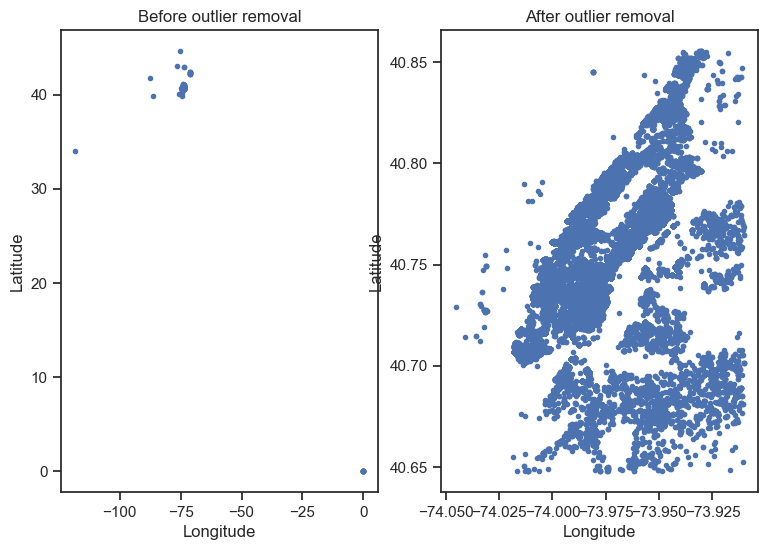

In [52]:
# Create a DataFrame 'train' with your dataset

fig, ax = plt.subplots(1, 2, figsize=(9, 6))
print('Length before removing outliers', len(train))

# Plot the data before outlier removal
ax[0].plot(train.longitude, train.latitude, '.')
ax[0].set_title('Before outlier removal')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Outlier removal
for col in ['latitude', 'longitude']:
    while True:
        median_val = train[col].median()
        std_val = train[col].std()
        ix = abs(train[col] - median_val) > 3 * std_val
        if ix.sum() == 0:  # no more outliers -> stop
            break
        train.loc[ix, col] = np.nan  # exclude outliers

# Keep only non-outlier listings
train = train.dropna(subset=['latitude', 'longitude'])
print('Length after removing outliers', len(train))

# Show location coordinates after outlier removal
ax[1].plot(train.longitude, train.latitude, '.')
ax[1].set_title('After outlier removal')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.show()


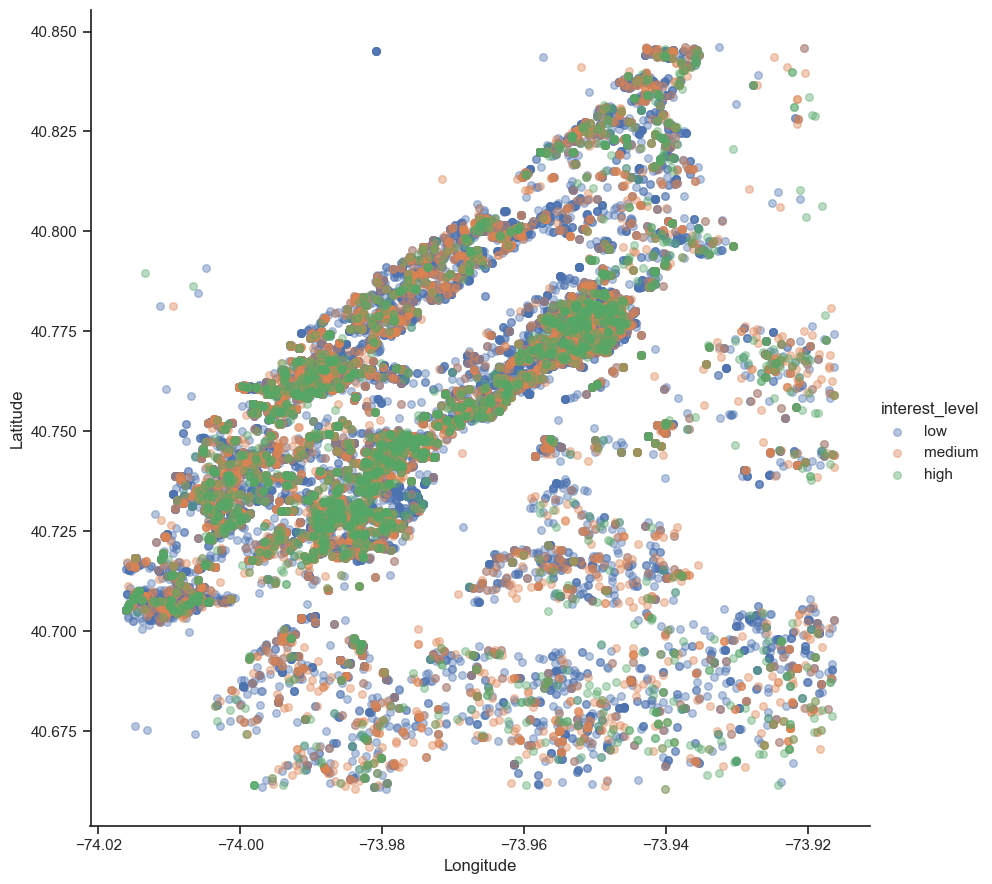

In [53]:
# Adjust the DataFrame and column names according to your dataset
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], height=9, scatter_kws={'alpha': 0.4, 's': 30},
           data=train[(train.longitude > train.longitude.quantile(0.005))
                      & (train.longitude < train.longitude.quantile(0.995))
                      & (train.latitude > train.latitude.quantile(0.005))
                      & (train.latitude < train.latitude.quantile(0.995))])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [54]:
num_map = {'high':1, 'medium':0.5, 'low':0}
train['interest_level'] = train['interest_level'].apply(lambda x: num_map[x])

Exploring longitude, latitude

One possibility is to encode neighborhoods using k-means clustering. Result: Due to overlapping clusters, even when increasing ncomp to 100 or even higher, the predictive value of this cluster label is limited.
External data including the actual map of New York City are forbidden for use in this competition. However, it is possible to approximate which of the five boroughs the apartment listing belongs to by using the centroids of 5 clusters based on k-means.

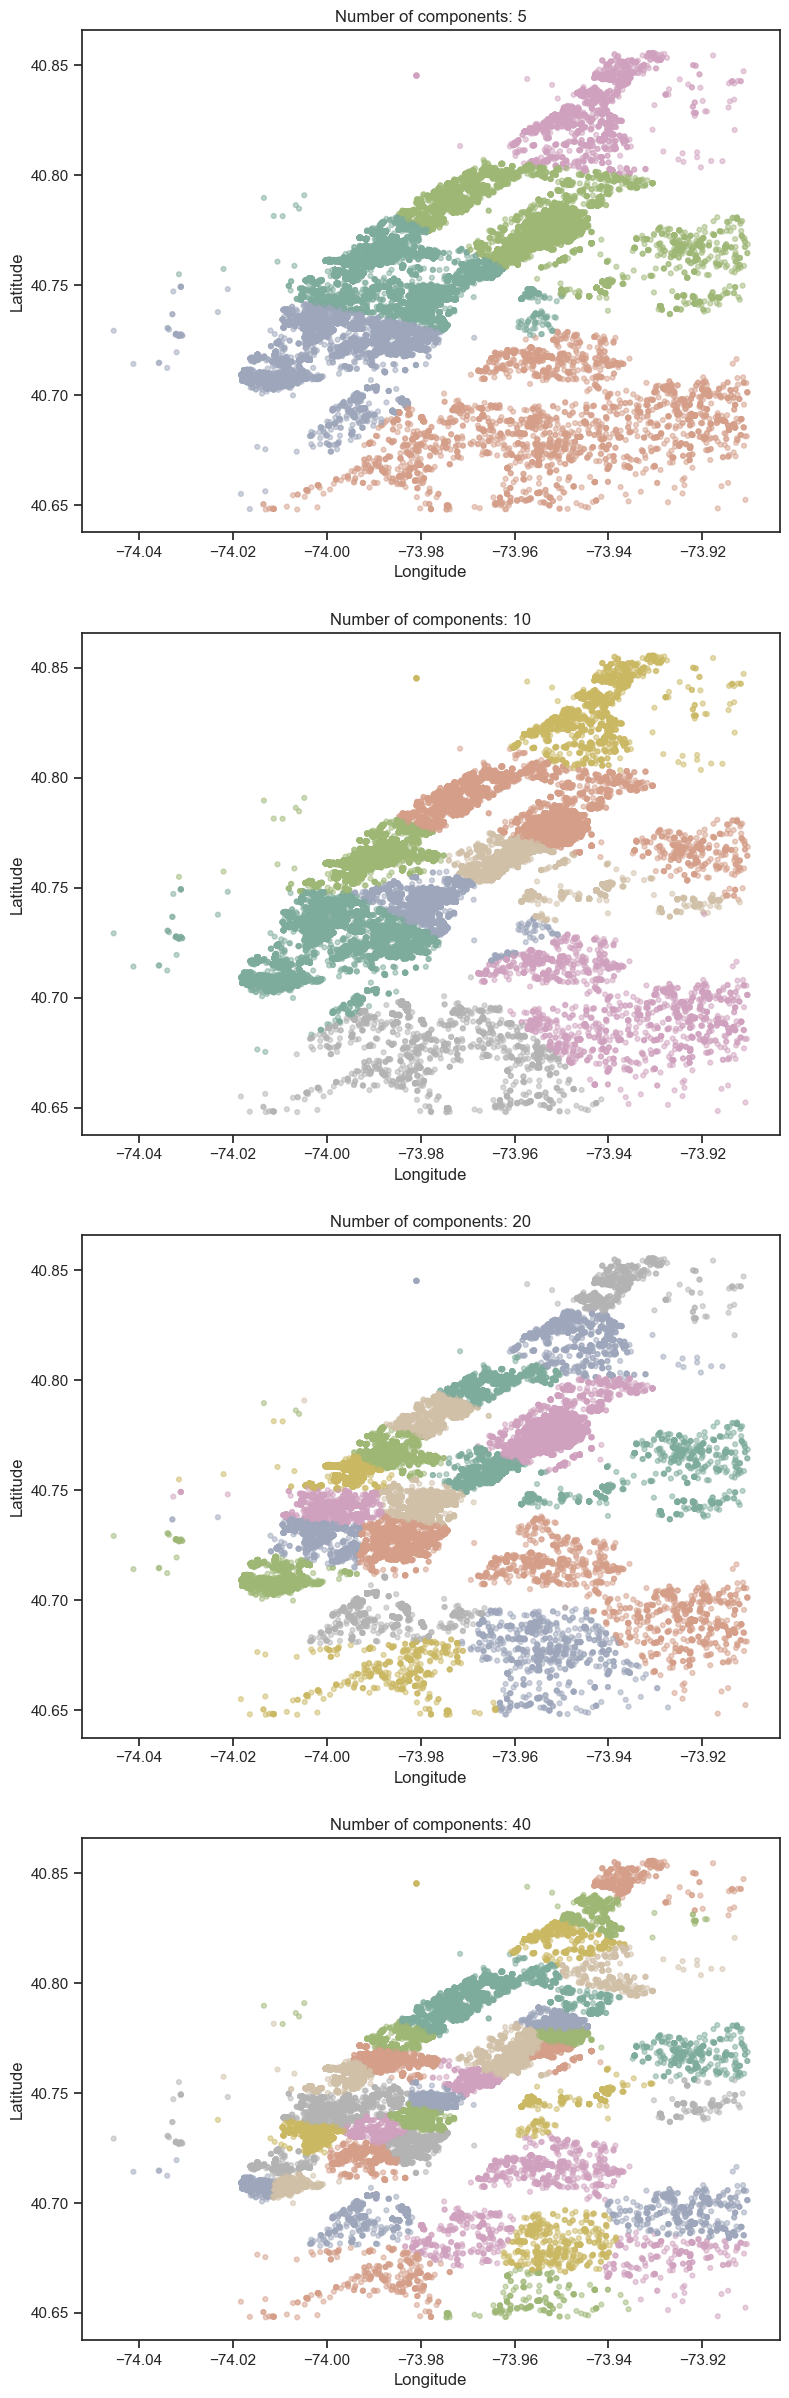

In [55]:
# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(9, 30))

for ix, ncomp in enumerate([5, 10, 20, 40]): 
    r = KMeans(ncomp, random_state=1)
    
    # Normalize longitude and latitude (if needed)
    temp = train[['longitude', 'latitude']].copy()
    
    # Fit k-means and get labels
    r.fit(temp)
    
    # Plot results
    cols = sns.color_palette("Set2", n_colors=ncomp, desat=0.5)
    cl = [cols[i] for i in r.labels_]
    area = 12
    ax[ix].scatter(train.longitude, train.latitude, s=area, c=cl, alpha=0.5)
    ax[ix].set_title('Number of components: ' + str(ncomp))
    ax[ix].set_xlabel('Longitude')
    ax[ix].set_ylabel('Latitude')

plt.show()

In [56]:
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'train' with 'longitude' and 'latitude' columns

# Create a KMeans model with 5 clusters
k = KMeans(n_clusters=5, random_state=1)

# Normalize longitude and latitude (if needed)
data = train[['longitude', 'latitude']].copy()
data['longitude'] = (data['longitude'] - data['longitude'].mean()) / data['longitude'].std()
data['latitude'] = (data['latitude'] - data['latitude'].mean()) / data['latitude'].std()

# Fit the KMeans model to your data
k.fit(data)

# Get the centroids of the clusters
centroids = k.cluster_centers_

# Display the centroids
print(centroids)


[[-1.19873773 -1.05201639]
 [ 0.86932709  0.73040215]
 [-0.41036566 -0.04111305]
 [ 1.43908153  2.13739704]
 [ 1.3072469  -1.70383634]]


In [57]:
data['longitude']

4         0.985742
6         0.159931
9         0.597656
10        1.500182
15        0.065166
            ...   
123998   -0.720031
124000    1.631048
124002    0.809750
124008   -1.171294
124009    0.205057
Name: longitude, Length: 46511, dtype: float64

In [58]:
data['latitude']

4        -1.182688
6        -0.007737
9         0.172132
10       -1.075347
15       -0.222420
            ...   
123998    0.360704
124000    2.661285
124002    1.979524
124008   -0.196310
124009    0.227253
Name: latitude, Length: 46511, dtype: float64

#### Exploring Manager Id 

In [59]:
managers_train = train[['manager_id', 'interest_level']]
managers_test = test['manager_id']

In [60]:
managers_all = pd.concat([managers_train['manager_id'], managers_test], ignore_index = True)


In [61]:
train[['manager_id', 'interest_level']].shape


(46511, 2)

In [62]:
sum(managers_all.value_counts() > 20)


1143

In [63]:
sum(managers_train['manager_id'].value_counts() >= 10)


1006

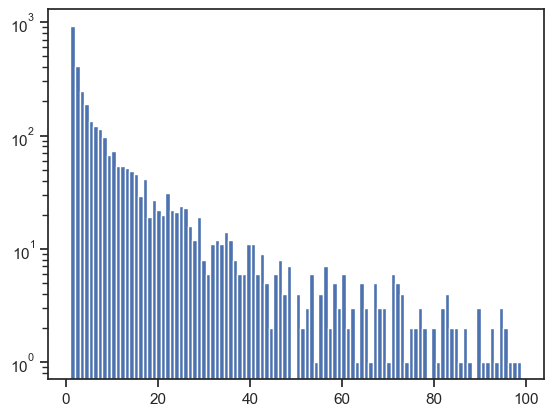

In [64]:
plt.hist(managers_train['manager_id'].value_counts()[60:], bins = 100)
plt.yscale('log')

In [65]:
counts = managers_train['manager_id'].value_counts()


In [66]:
len(counts.index[counts >= 10])


1006

In [67]:
managers_train['manager_count'] = managers_train.groupby('manager_id').transform(len)


In [68]:
np.mean(managers_train['manager_count'] >= 10)


0.8529595149534519

In [69]:
dict(zip([1, 2], [3, 4]))


{1: 3, 2: 4}

In [70]:
class CategoricalFilter(object):
    
    def __init__(self, top_categories = 999):
        self.top_categories = top_categories
    
    def fit(self, series):
        counts = series.value_counts()
        self.category_mapper = dict(zip(counts.index[:self.top_categories],
                                    range(1, self.top_categories + 1)))
    
    def transform(self, series):
        return series.apply(lambda key: self.category_mapper.get(key, 0))

In [71]:
catfilter = CategoricalFilter()


In [72]:
catfilter.fit(managers_train['manager_id'])


In [73]:
transformed_managers = catfilter.transform(managers_train['manager_id'])


In [74]:
train['transformed_managers'] = transformed_managers
transformed_managers.head(20)


4     194
6     400
9      71
10     77
15    172
16     26
18     31
19     45
23    284
32    339
33    310
36      0
38     48
39    265
42    264
43    652
44    866
46      0
49    433
61      0
Name: manager_id, dtype: int64

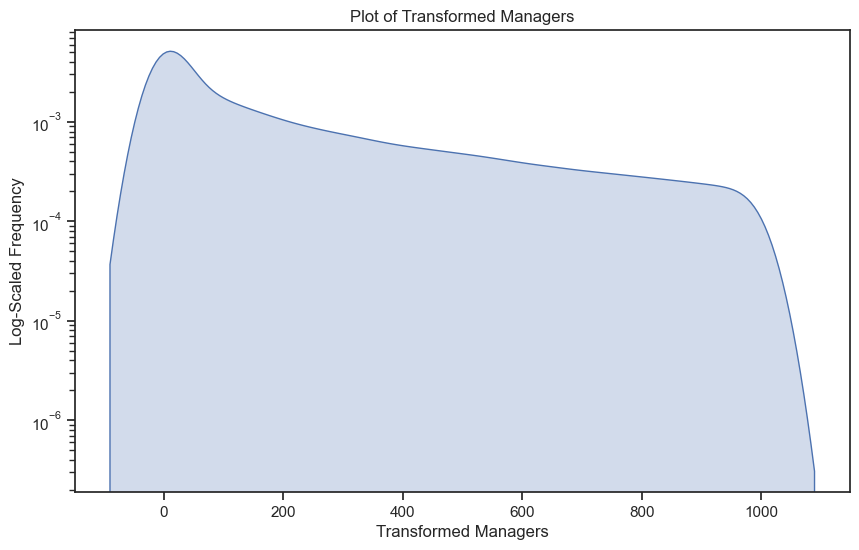

In [75]:
plt.figure(figsize=(10, 6))
sns.kdeplot(transformed_managers, shade=True, color="b")
plt.yscale('log')
plt.xlabel('Transformed Managers')
plt.ylabel('Log-Scaled Frequency')
plt.title('Plot of Transformed Managers')
plt.show()

In [76]:
transformed_test = catfilter.transform(managers_test)


In [77]:
np.mean(transformed_test == 0)


0.17775485875781888

In [78]:
np.mean(transformed_managers == 0)


0.14854550536432243

In [79]:
train["num_features"] = train["features"].apply(len)


In [80]:
train["num_photos"] = train["photos"].apply(len)


In [81]:
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))

In [82]:
# adding all these new features to use list #
#features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])

In [83]:
interest_level_mapping = {0 : 0, 0.5 : 1, 1: 2}
train['interest_level'] = train['interest_level'].map(interest_level_mapping)
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude  ...  \
4    40.7108     7170325   -73.9539  ...   
6    40.7513     7092344   -73.9722  ...   
9    40.7575     7158677   -73.9625  ...   
10   40.7145     7211212   -73.9425  ...   
15   40.7439     7225292   -73.9743  ...   

                                               photos price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...  2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...  3800   
9   [https://photos.renthop.com/2/7158677_c897a134...  3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...  3000   
15  [https://photos.renthop.com/2/7225292_901f1984...  2795   

             street_address interest_level  manager_skill  \
4       145 Borinquen Place              1       1.526786   
6             230 East 44th              0       1.692308   
9      405 East 56th Street              1       1.268817   
10  792 Metropolitan Avenue              1       1.255556   
15     340 East 34th Street              0       1.145455   

    building_id_transform  transformed_managers  num_features  num_photos  \
4                     5.0                   194             7          12   
6                    51.0                   400             6           6   
9                    71.0                    71             6           6   
10                    3.0                    77             0           5   
15                   86.0                   172             4           4   

    num_description_words  
4                      77  
6                     131  
9                     119  
10                     95  
15                     41  

[5 rows x 21 columns]

In [84]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.day
train['month'] = train['created'].dt.month
train['year'] = train['created'].dt.year
train.head(5)

bathrooms  bedrooms                       building_id             created  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a 2016-06-16 05:55:27   
6         1.0         2  b8e75fc949a6cd8225b455648a951712 2016-06-01 05:44:33   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49 2016-06-14 15:19:59   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85 2016-06-24 07:54:24   
15        1.0         0  bfb9405149bfff42a92980b594c28234 2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude  ... interest_level manager_skill  building_id_transform  \
4    -73.9539  ...              1      1.526786                    5.0   
6    -73.9722  ...              0      1.692308                   51.0   
9    -73.9625  ...              1      1.268817                   71.0   
10   -73.9425  ...              1      1.255556                    3.0   
15   -73.9743  ...              0      1.145455                   86.0   

   transformed_managers  num_features  num_photos  num_description_words  \
4                   194             7          12                     77   
6                   400             6           6                    131   
9                    71             6           6                    119   
10                   77             0           5                     95   
15                  172             4           4                     41   

    date  month  year  
4     16      6  2016  
6      1      6  2016  
9     14      6  2016  
10    24      6  2016  
15    28      6  2016  

[5 rows x 24 columns]

In [85]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
train['combined_date'] = train['date'].astype(str) + '-' + train['month'].astype(str) + '-' + train['year'].astype(str)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'combined_date' attribute
train['combined_date_encoded'] = label_encoder.fit_transform(train['combined_date'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'combined_date_encoded' attribute
train['combined_date_normalized'] = scaler.fit_transform(train['combined_date_encoded'].values.reshape(-1, 1))

# Display the first few rows of the updated dataset

# Now, you can use the 'combined_date_normalized' attribute as a numeric feature for training your machine learning model.


In [86]:
for feature in ['description', 'features']:
    if feature == 'features':
        # Flatten the lists of features and then count unique labels
        unique_labels = len(set(item for sublist in train[feature] for item in sublist))
    else:
        # For non-list columns, count unique labels directly
        unique_labels = len(train[feature].unique())
    print(f"{feature}: {unique_labels} labels")


description: 36120 labels
features: 1469 labels


In [87]:
unique_feature_labels = set(item for sublist in train['features'] for item in sublist)
print("Unique labels in 'features':")
for label in unique_feature_labels:
    print(label)

Unique labels in 'features':
Garage Parking!
Flex-1
spacious
Near PRATT
** NO BROKER FEE! * MASSIVE 2BR SUPER SHARE * EAT-IN KITCHEN * PRIVATE TERRACE * ELEV/LNDRY BLDG * 1 BLK TO L TRAIN **
Large Living room
PERFECT LOCATION!!!!
Roof Access
2 Bedroon Convertible
Live-In Super
Exercise/Yoga Studio
exclusive rental
Stone countertops
Marble Bathrooms
Island Kitchen
pet friendly
30th & 3rd ave
Party room
MIDRISE
NO FEE!
water view
Pre-War small dogs
Great Location
Electronic Rent Payment
Natural Sunlight
free gym
Large Living room & Bedrooms
Steps to Prospect Park
King-Sized Bedroom
** EXTREME E50s EXCELLENCE * ALL MODERN & NEW * MASSIVE 1BR HOME * GOURMET KITCHEN * LNDRY BLDG * REAL PIX **
25lb weight limit on pet
Duplex Layout
on site dog park and pet spa
Bluetooth
state-of-the-art fitness center and even an on-site dog run
Super On Site
No broker fee!
Full Kitchen
stainless steel
Furnished
exercise studio
Modern Finishes
Building Link Notification & Key Track for tenants convenience
Bi

In [88]:
train.head(5)

bathrooms  bedrooms                       building_id             created  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a 2016-06-16 05:55:27   
6         1.0         2  b8e75fc949a6cd8225b455648a951712 2016-06-01 05:44:33   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49 2016-06-14 15:19:59   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85 2016-06-24 07:54:24   
15        1.0         0  bfb9405149bfff42a92980b594c28234 2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude  ... transformed_managers num_features  num_photos  \
4    -73.9539  ...                  194            7          12   
6    -73.9722  ...                  400            6           6   
9    -73.9625  ...                   71            6           6   
10   -73.9425  ...                   77            0           5   
15   -73.9743  ...                  172            4           4   

   num_description_words  date  month  year  combined_date  \
4                     77    16      6  2016      16-6-2016   
6                    131     1      6  2016       1-6-2016   
9                    119    14      6  2016      14-6-2016   
10                    95    24      6  2016      24-6-2016   
15                    41    28      6  2016      28-6-2016   

    combined_date_encoded  combined_date_normalized  
4                      23                  0.258427  
6                       2                  0.022472  
9                      17                  0.191011  
10                     50                  0.561798  
15                     62                  0.696629  

[5 rows x 27 columns]

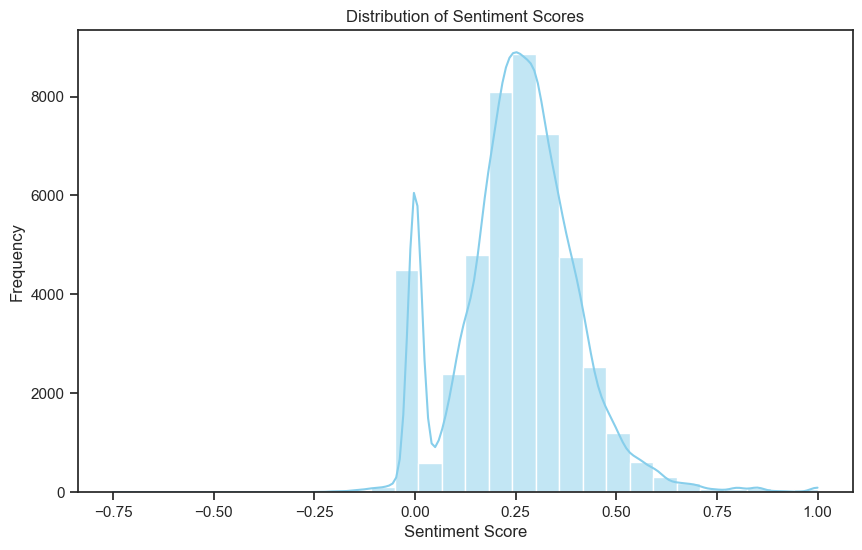

In [89]:
import pandas as pd
from textblob import TextBlob
from matplotlib import pyplot as plt
import seaborn as sns


descriptions = train["description"]

# Perform sentiment analysis using TextBlob
sentiments = descriptions.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Add sentiment scores to the DataFrame
train["Sentiment"] = sentiments

# Display the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(train["Sentiment"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# feature selection

Feature Selection- Correlation
In this step we will be removing the features which are highly correlated

In [90]:
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names


['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'interest_level',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'year',
 'combined_date_encoded',
 'combined_date_normalized',
 'Sentiment']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train[
['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'combined_date_encoded',
 'combined_date_normalized',
 'Sentiment',
'interest_level']],train['interest_level'],test_size=0.3,random_state=100)

In [92]:
x_train.isnull().sum()

bathrooms                      0
bedrooms                       0
latitude                       0
listing_id                     0
longitude                      0
price                          0
manager_skill                  0
building_id_transform       5482
transformed_managers           0
num_features                   0
num_photos                     0
num_description_words          0
date                           0
month                          0
combined_date_encoded          0
combined_date_normalized       0
Sentiment                      0
interest_level                 0
dtype: int64

In [93]:
x_train['building_id_transform'].fillna(0, inplace=True)
x_test['building_id_transform'].fillna(0, inplace=True)
x_train.isnull().sum()


bathrooms                   0
bedrooms                    0
latitude                    0
listing_id                  0
longitude                   0
price                       0
manager_skill               0
building_id_transform       0
transformed_managers        0
num_features                0
num_photos                  0
num_description_words       0
date                        0
month                       0
combined_date_encoded       0
combined_date_normalized    0
Sentiment                   0
interest_level              0
dtype: int64

<Axes: >

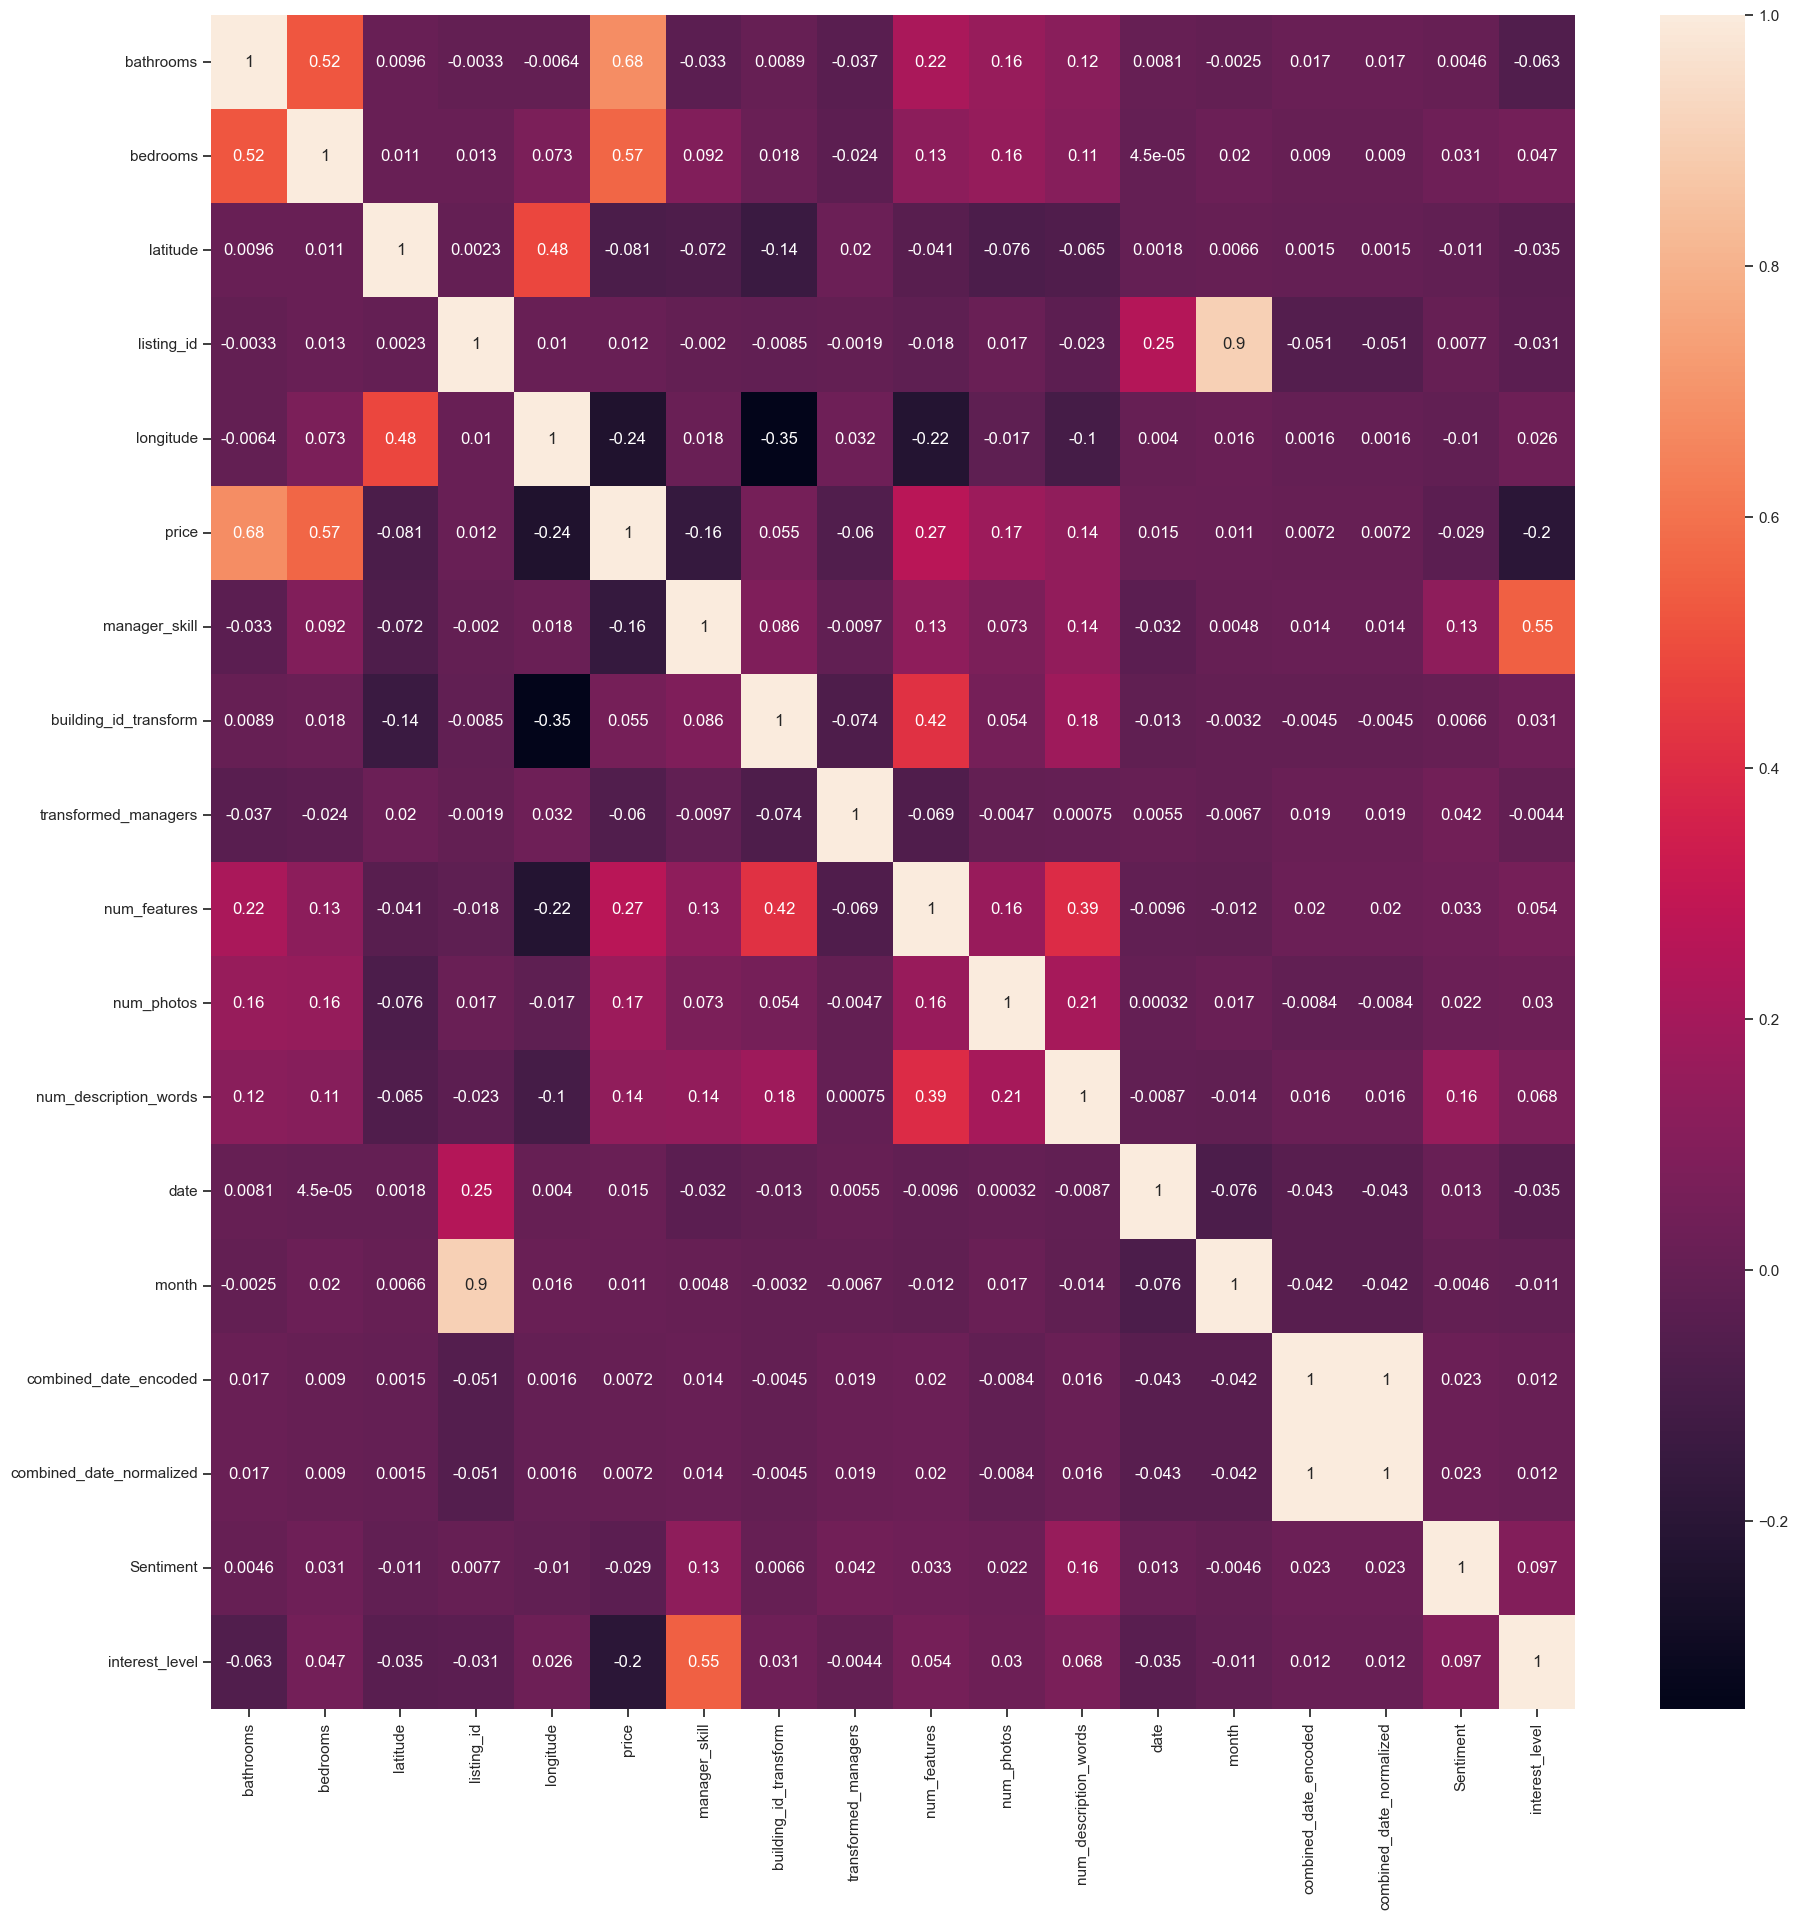

In [94]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(22,22)
sns.heatmap(corrmat,annot=True)

#### CHI SQUARE feature prediction


Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

In [353]:
x_train['building_id_transform'].fillna(0, inplace=True)
x_test['building_id_transform'].fillna(0, inplace=True)
x_train.isnull().sum()

bathrooms                   0
bedrooms                    0
latitude                    0
listing_id                  0
longitude                   0
price                       0
manager_skill               0
building_id_transform       0
transformed_managers        0
num_features                0
num_photos                  0
num_description_words       0
date                        0
month                       0
combined_date_encoded       0
combined_date_normalized    0
Sentiment                   0
interest_level              0
dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train contains your feature data

# Scale the features to the range [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply chi2 to the scaled data
f_p_values = chi2(x_train_scaled, y_train)

In [ ]:
f_p_values


In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

In [ ]:
p_values.sort_index(ascending=False)


In [ ]:
# Create a bar plot to visualize the most important features
plt.figure(figsize=(10, 6))
p_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('P-Values')
plt.title('Most Important Features based on P-Values')
plt.show()


Feature Selection-Information gain - mutual information In Regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
#list of all numeric data
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names

# Models

In [ ]:
train

In [ ]:
features = train[[
 'bedrooms',
 'listing_id',
 'longitude',
 'price',
 'manager_skill',
 'building_id_transform',
 'num_features',
 'num_photos',
 'num_description_words',
 'combined_date_normalized']]
target = train['interest_level']

In [ ]:
features = pd.get_dummies(features)

In [ ]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

In [ ]:
features = features.astype(float)

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.preprocessing import label_binarize

# Assuming y_pred contains predictions for two classes
n_classes = 3  # The number of classes in your true labels

# Reformat y_pred to match the number of classes in y_train
y_pred_reformatted = label_binarize(y_pred, classes=range(n_classes))

# Now, you can calculate log-loss
logloss = log_loss(y_train[:100], y_pred_reformatted[:100])
print(logloss)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
Logistic_Report = classification_report(y_test, y_pred, output_dict=True)
Logistic_f1 = Logistic_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)

In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = [accuracy_score(y_test, [1 if p >= thr else 0 for p in y_pred_prob[:, 1]]) for thr in thresholds]

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy vs. Decision Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score

# Define a function to plot error and loss curves
def plot_error_loss_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_losses, test_losses = [], []

    # Define a range of hyperparameters (e.g., alpha for regularization)
    hyperparameters = [0.001, 0.01, 0.1, 1, 10]

    for hyperparameter in hyperparameters:
        model.set_params(C=hyperparameter)  # Set the hyperparameter (replace with your hyperparameter)

        model.fit(X_train, y_train)  # Train the model

        # Training set predictions
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)

        # Test set predictions
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)

        # Calculate and append training and test errors
        train_errors.append(1 - accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))

        # Calculate and append log loss
        train_losses.append(log_loss(y_train, y_train_prob))
        test_losses.append(log_loss(y_test, y_test_prob))

    # Plot error curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hyperparameters, train_errors, "r-", label="Training Set")
    plt.plot(hyperparameters, test_errors, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Error")
    plt.title("Error Curves")
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(hyperparameters, train_losses, "r-", label="Training Set")
    plt.plot(hyperparameters, test_losses, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Log Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.show()

# Call the function to plot error and loss curves
plot_error_loss_curves(LogisticRegression(), X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (e.g., Logistic Regression)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
kVals = range(1, 30, 2)
accuracies = []
for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

In [ ]:
from sklearn.preprocessing import label_binarize

# Assuming y_pred contains predictions for two classes
n_classes = 3  # The number of classes in your true labels

# Reformat y_pred to match the number of classes in y_train
y_pred_reformatted = label_binarize(y_pred, classes=range(n_classes))

# Now, you can calculate log-loss
logloss = log_loss(y_train[:100], y_pred_reformatted[:100], labels=range(n_classes))
print(logloss)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 30, 2)}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Re-train the model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [ ]:
kVals = range(1, 30, 2)
error_rates = []
log_losses = []

for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Ensure y_pred has the same number of classes as y_test
    classes = np.unique(y_test)
    y_pred = label_binarize(y_pred, classes=classes)
    
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    
    log_loss_value = log_loss(y_test, y_pred)
    log_losses.append(log_loss_value)

In [ ]:
fig, ax = plt.subplots()
ax.plot(kVals, accuracies)
ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of kNN for different values of k')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(kVals, error_rates, marker='o', linestyle='-')
plt.title("Error Rate vs. k Value")
plt.xlabel("k Value")
plt.ylabel("Error Rate")

plt.subplot(1, 2, 2)
plt.plot(kVals, log_losses, marker='o', linestyle='-')
plt.title("Log Loss vs. k Value")
plt.xlabel("k Value")
plt.ylabel("Log Loss")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (e.g., Logistic Regression)
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
KNN_Report = classification_report(y_test, y_pred, output_dict=True)
KNN_f1 = KNN_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=1)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy_before_tuning = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming you have X_train, X_test, y_train, y_test
# Adjust the hyperparameter grid as needed
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rfc = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Evaluate the model
accuracy = best_rfc.score(X_test, y_test)
accuracy_after_tuning = accuracy 
print(f"Accuracy on Test Set: {accuracy}")
ACCURACY_1 = accuracy_after_tuning 

In [ ]:
models = ['Before Tuning', 'After Tuning']
accuracies = [accuracy_before_tuning, accuracy_after_tuning]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.ylim(0, 1)

# Adding values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 4)), ha='center', va='bottom')

plt.show()


In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
Forest_Report = classification_report(y_test, y_pred, output_dict=True)
Forest_f1 = Forest_Report['weighted avg']['f1-score']

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rfc_before_tuning = RandomForestClassifier(n_estimators=1, random_state=42)

# Fit and evaluate the model before hyperparameter tuning
rfc_before_tuning.fit(X_train, y_train)
y_pred_before_tuning = rfc_before_tuning.predict(X_test)
log_loss_before_tuning = log_loss(y_test, y_pred_before_tuning)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_

# Predict probabilities for log loss calculation
y_prob_after_tuning = best_rfc.predict_proba(X_test)

# Calculate log loss after hyperparameter tuning
log_loss_after_tuning = log_loss(y_test, y_prob_after_tuning)

# Plotting Log Loss Curve
plt.figure(figsize=(12, 6))
plt.plot(['Before Tuning', 'After Tuning'], [log_loss_before_tuning, log_loss_after_tuning], marker='o', linestyle='-', color='blue')
plt.title('Log Loss Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

# Plotting Error Rate Curve
error_rates = []
for model in [rfc_before_tuning, best_rfc]:
    y_pred = model.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

plt.figure(figsize=(12, 6))
plt.plot(['Before Tuning', 'After Tuning'], error_rates, marker='o', linestyle='-', color='red')
plt.title('Error Rate Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


# SVC MODEL

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
SVC_Report = classification_report(y_test, y_pred, output_dict=True)
SVC_f1 = SVC_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=SVC(random_state=42, probability=True),
                           param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Predictions and evaluation before tuning
y_pred_before_tuning = svc.predict(X_test)
accuracy_before_tuning = accuracy_score(y_test, y_pred_before_tuning)

# Predictions and evaluation after tuning
y_prob_after_tuning = best_svc.predict_proba(X_test)
y_pred_after_tuning = best_svc.predict(X_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred_after_tuning)
# Display accuracy comparison graph
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(['Before Tuning', 'After Tuning'], [accuracy_before_tuning, accuracy_after_tuning], color=['red', 'green'])

# Display accuracy values on the graph
for bar, acc in zip(bar_plot, [accuracy_before_tuning, accuracy_after_tuning]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(acc, 4), ha='center', va='bottom')

plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Initialize lists to store training errors and log loss
training_errors = []
log_losses = []

# Train the model and collect errors and log loss during training
for C in param_grid['C']:
    svc_model = SVC(C=C, kernel='rbf', gamma='scale', probability=True, random_state=42)
    svc_model.fit(X_train, y_train)
    
    # Training error
    training_errors.append(1 - svc_model.score(X_train, y_train))
    
    # Log loss
    y_prob = svc_model.predict_proba(X_train)
    log_losses.append(log_loss(y_train, y_prob))

# Plotting Error Curve
plt.figure(figsize=(12, 6))
plt.plot(param_grid['C'], training_errors, marker='o', linestyle='-')
plt.title('Error Curve During Training')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

# Plotting Log Loss Curve
plt.figure(figsize=(12, 6))
plt.plot(param_grid['C'], log_losses, marker='o', linestyle='-')
plt.title('Log Loss Curve During Training')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

MODEL COMPARISION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy of each model
logreg_accuracy = logreg.score(X_test, y_test)
knn_accuracy = knn.score(X_test, y_test)
rfc_accuracy = best_rfc.score(X_test, y_test)
svc_accuracy = accuracy_score(y_test, y_pred_after_tuning)

# Create a list of accuracies
accuracies = [logreg_accuracy, knn_accuracy, rfc_accuracy, svc_accuracy]

# Create a list of model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom', fontsize=12, color='black')

plt.ylim(0, 1)
plt.show()


In [105]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer


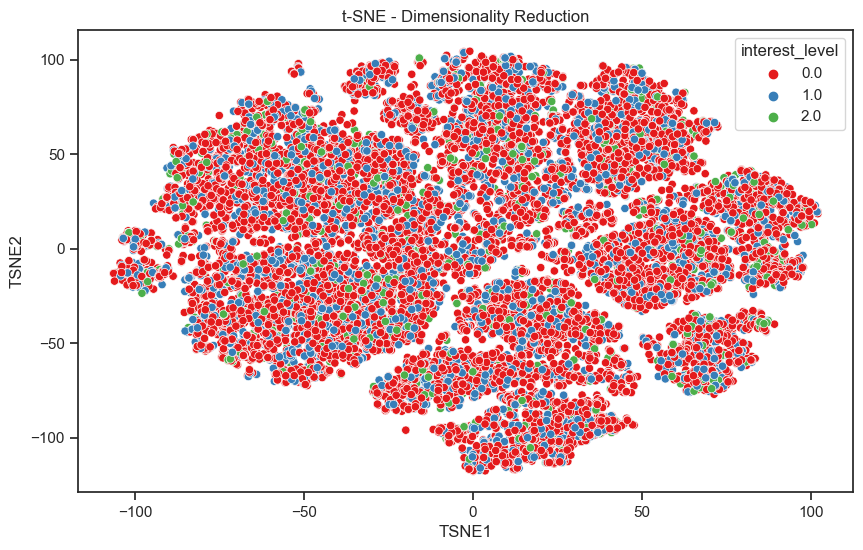

In [106]:
from sklearn.manifold import TSNE
# Handling missing values with IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Use StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with the reduced dimensions
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['interest_level'] = y

# Visualize the reduced dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='interest_level', data=df_tsne, palette='Set1')
plt.title('t-SNE - Dimensionality Reduction')
plt.show()


## Probabilistic model

GaussianNB

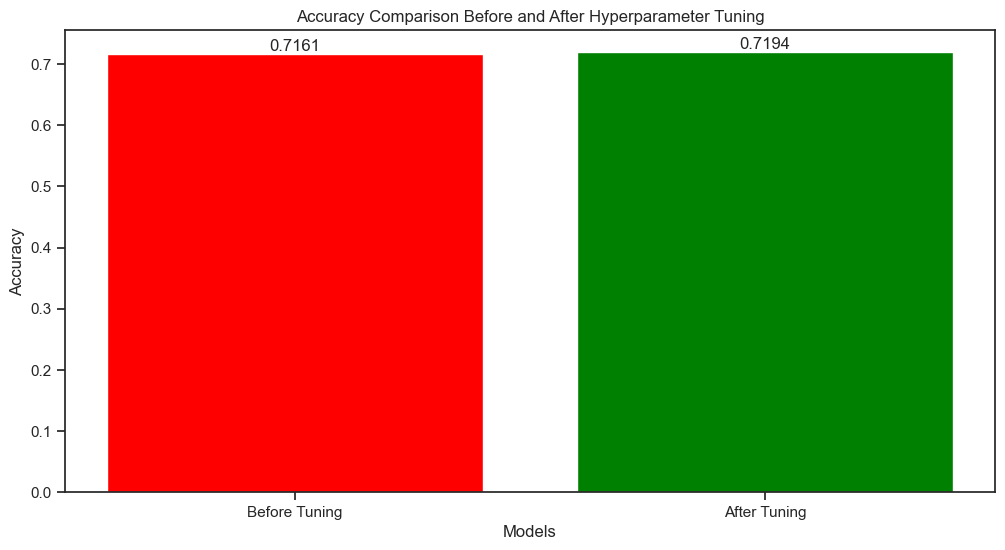

In [94]:
from sklearn.naive_bayes import GaussianNB

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=100)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(x_train, y_train)

# Hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_gnb = grid_search.best_estimator_

# Predictions and evaluation before tuning
y_pred_before_tuning = gnb.predict(x_test)
accuracy_before_tuning = accuracy_score(y_test, y_pred_before_tuning)

# Predictions and evaluation after tuning
y_pred_after_tuning = best_gnb.predict(x_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred_after_tuning)

# Display accuracy comparison graph
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(['Before Tuning', 'After Tuning'], [accuracy_before_tuning, accuracy_after_tuning], color=['red', 'green'])

# Display accuracy values on the graph
for bar, acc in zip(bar_plot, [accuracy_before_tuning, accuracy_after_tuning]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(acc, 4), ha='center', va='bottom')

plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()



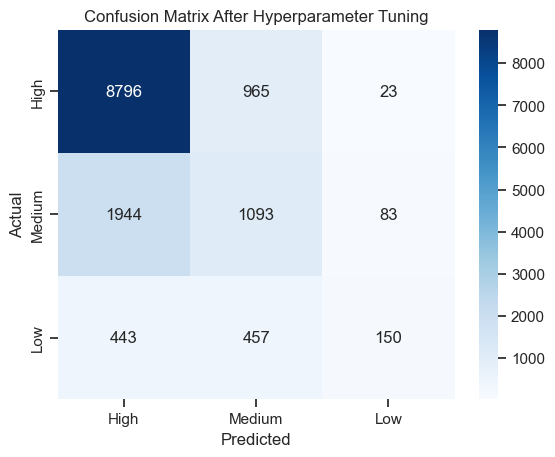

In [95]:
# Confusion Matrix
conf_matrix_after_tuning = confusion_matrix(y_test, y_pred_after_tuning)
sns.heatmap(conf_matrix_after_tuning, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'])
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Precision, Recall, and F1-score after tuning
precision_after_tuning = precision_score(y_test, y_pred_after_tuning, average='weighted')
recall_after_tuning = recall_score(y_test, y_pred_after_tuning, average='weighted')
f1_score_after_tuning = f1_score(y_test, y_pred_after_tuning, average='weighted')

print(f'Precision After Tuning: {precision_after_tuning:.4f}')
print(f'Recall After Tuning: {recall_after_tuning:.4f}')
print(f'F1 Score After Tuning: {f1_score_after_tuning:.4f}')

Precision After Tuning: 0.6928
Recall After Tuning: 0.7194
F1 Score After Tuning: 0.6923


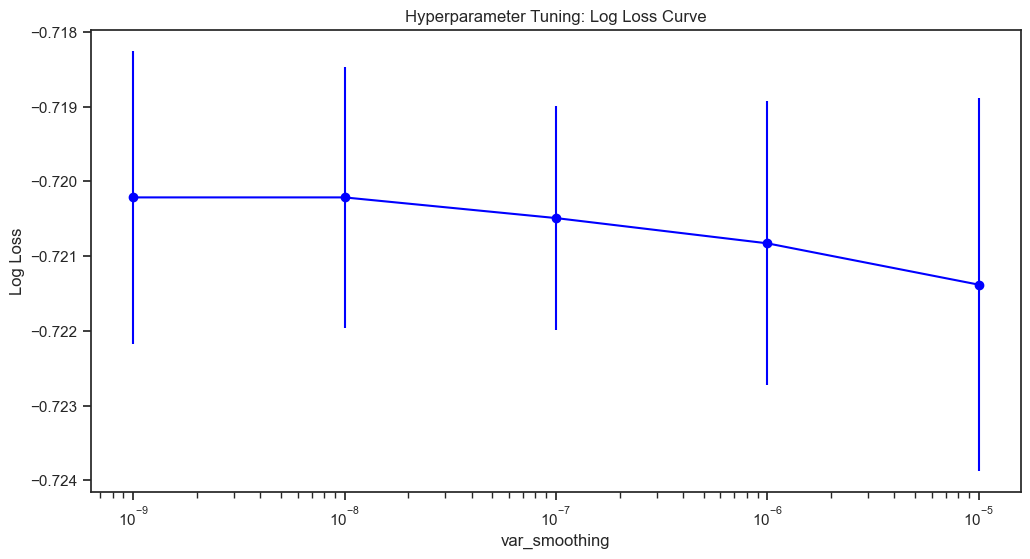

In [98]:
# Extracting mean and standard deviation of the log loss values
log_loss_mean_scores = -results['mean_test_score']
log_loss_std_scores = results['std_test_score']

# Plotting the log loss curve
plt.figure(figsize=(12, 6))
plt.errorbar(var_smoothing_values, log_loss_mean_scores, yerr=log_loss_std_scores, fmt='o-', color='blue')

plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.xlabel('var_smoothing')
plt.ylabel('Log Loss')
plt.title('Hyperparameter Tuning: Log Loss Curve')
plt.show()


Hidden Markov Model

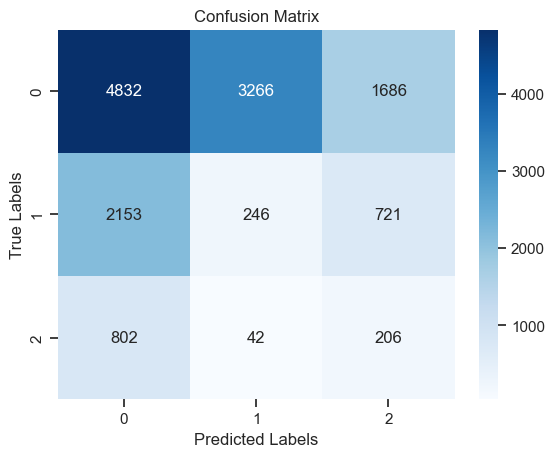

In [99]:
from hmmlearn import hmm
# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=100)

# Convert the target variable to numerical labels (required for HMM)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define and fit the HMM model
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=100)  # Add random_state for reproducibility
model.fit(x_train)

# Predict using the trained HMM model
y_pred = model.predict(x_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model (accuracy, confusion matrix, etc.)
accuracy = accuracy_score(y_test, y_pred_decoded)
conf_matrix = confusion_matrix(y_test, y_pred_decoded)

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize ROC curve (if applicable)
# Note: HMM may not be directly suitable for ROC curve analysis
# You may need to adapt the evaluation metrics based on the characteristics of your problem.


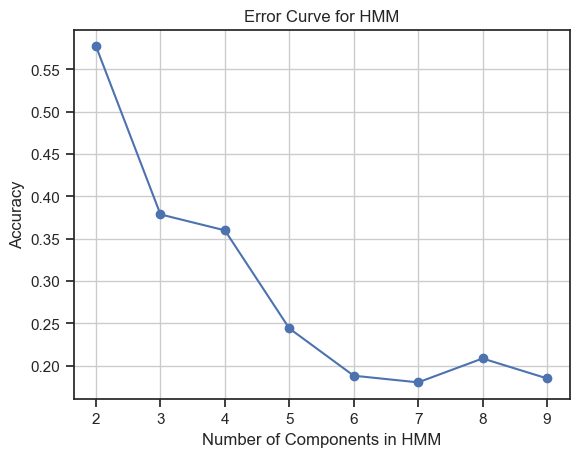

In [170]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=100)

# Convert the target variable to numerical labels (required for HMM)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Vary the number of components
num_components_range = range(2, 10)
accuracy_scores = []

for n_components in num_components_range:
    # Define and fit the HMM model
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, random_state=100)
    model.fit(x_train)

    # Predict using the trained HMM model
    y_pred = model.predict(x_test)

    # Handle unseen labels in predicted values
    y_pred = np.where(y_pred < len(label_encoder.classes_), y_pred, len(label_encoder.classes_) - 1)

    # Decode the predicted labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Evaluate the model and store the accuracy
    accuracy = accuracy_score(y_test, y_pred_decoded)
    accuracy_scores.append(accuracy)

# Plot the error curve
plt.plot(num_components_range, accuracy_scores, marker='o')
plt.xlabel('Number of Components in HMM')
plt.ylabel('Accuracy')
plt.title('Error Curve for HMM')
plt.grid(True)
plt.show()


Model is not converging.  Current: -333439.83080650325 is not greater than -329137.358827439. Delta is -4302.471979064227
Model is not converging.  Current: -334815.61845994025 is not greater than -322884.44325546274. Delta is -11931.175204477506
Model is not converging.  Current: -315025.1010437349 is not greater than -309565.0530722382. Delta is -5460.04797149665


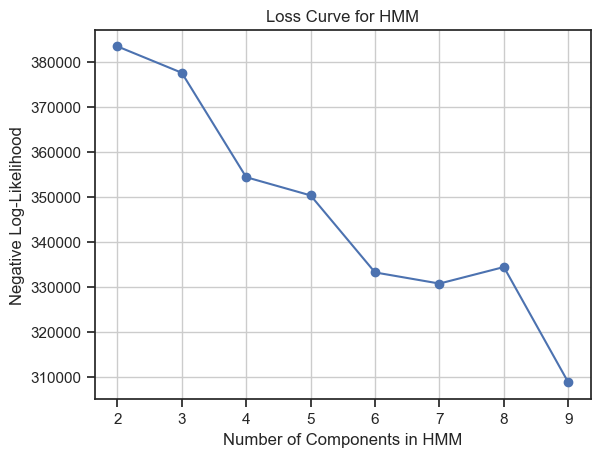

In [172]:
for n_components in num_components_range:
    # Define and fit the HMM model
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000, random_state=100)
    model.fit(x_train)

    # Get the log-likelihood of the observed data
    log_likelihood = model.score(x_train)
    log_likelihoods.append(log_likelihood)

# Plot the loss curve (negative log-likelihood)
plt.plot(num_components_range, -np.array(log_likelihoods), marker='o')
plt.xlabel('Number of Components in HMM')
plt.ylabel('Negative Log-Likelihood')
plt.title('Loss Curve for HMM')
plt.grid(True)
plt.show()


## Unsupervised model : 
K-mean Clustering 



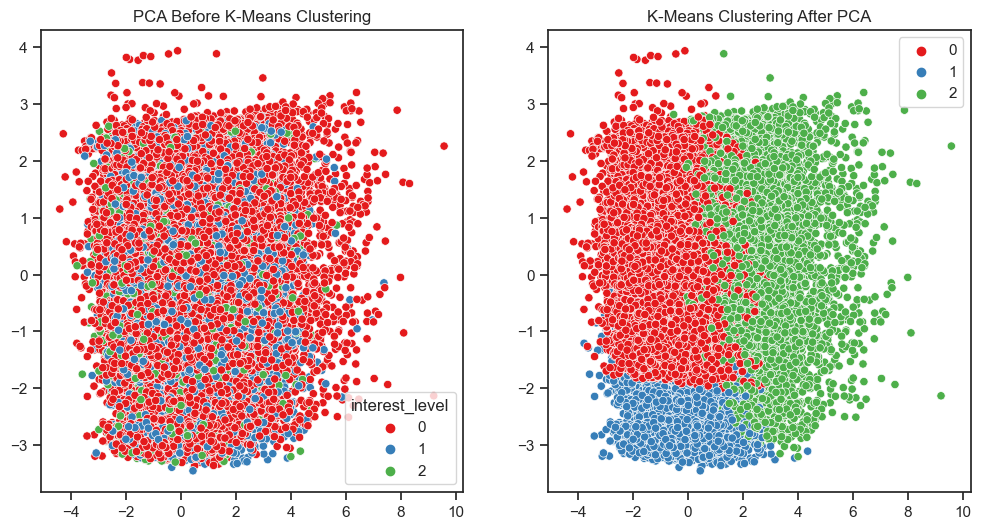

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your feature matrix
X = train[
    ['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price', 'manager_skill',
     'building_id_transform', 'transformed_managers', 'num_features', 'num_photos',
     'num_description_words', 'date', 'month', 'combined_date_encoded', 'combined_date_normalized']
]

# Target variable
y = train['interest_level']

# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Use StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Use PCA for dimensionality reduction before clustering
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X_scaled)

# Apply K-Means clustering before dimensionality reduction
kmeans_before = KMeans(n_clusters=3, random_state=42)
y_kmeans_before = kmeans_before.fit_predict(X_scaled)

# Visualize the clusters before dimensionality reduction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=y, palette='Set1')
plt.title('PCA Before K-Means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=y_kmeans_before, palette='Set1')
plt.title('K-Means Clustering After PCA')

plt.show()


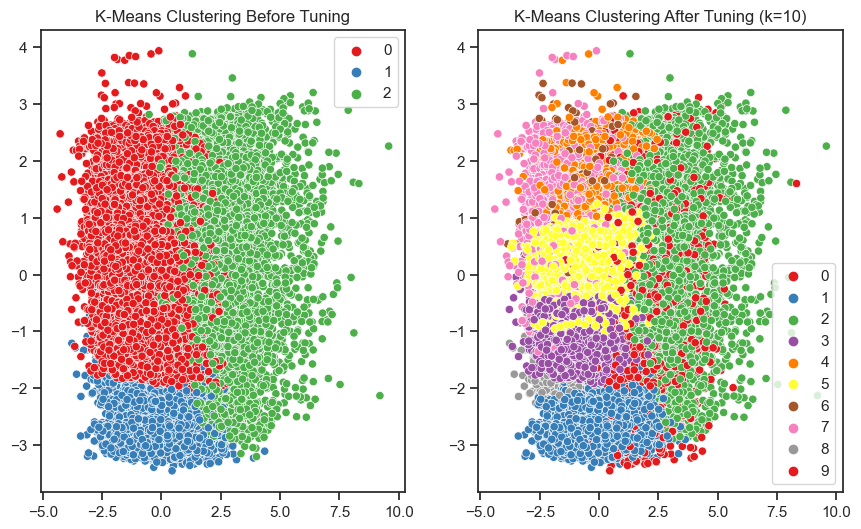

In [103]:
# Visualize the clusters before and after hyperparameter tuning
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=y_kmeans_before, palette='Set1')
plt.title('K-Means Clustering Before Tuning')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=y_kmeans_after, palette='Set1')
plt.title(f'K-Means Clustering After Tuning (k={optimal_k})')

plt.show()


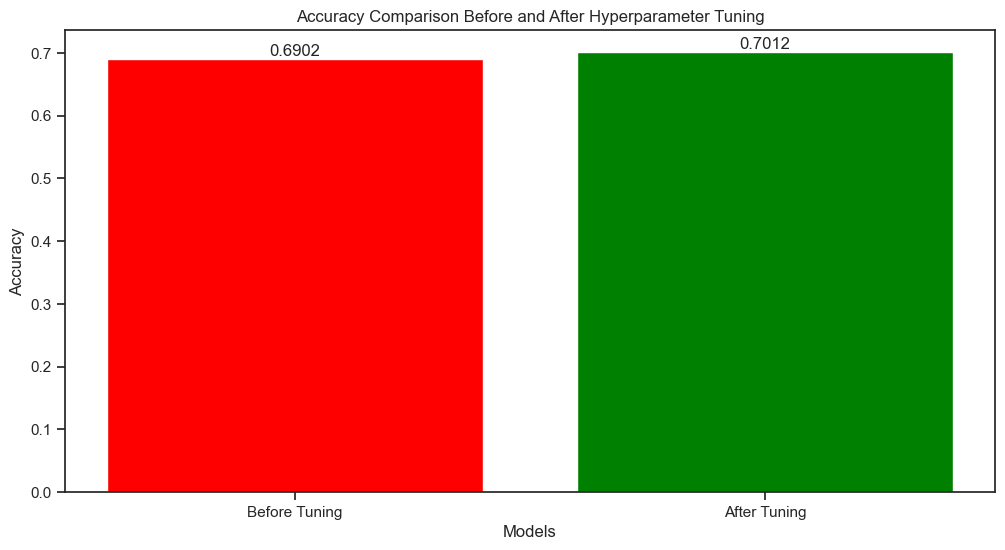

In [104]:

plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


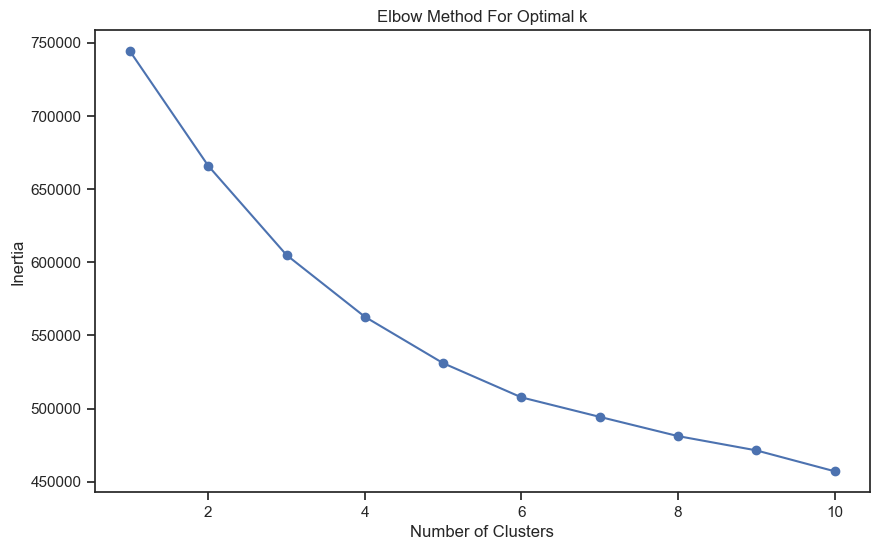

In [105]:
# Create an empty list to store inertia values (within-cluster sum of squares)
inertia_values = []

# Define a range of clusters to try
cluster_range = range(1, 11)

# Iterate through different numbers of clusters and calculate inertia for each
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



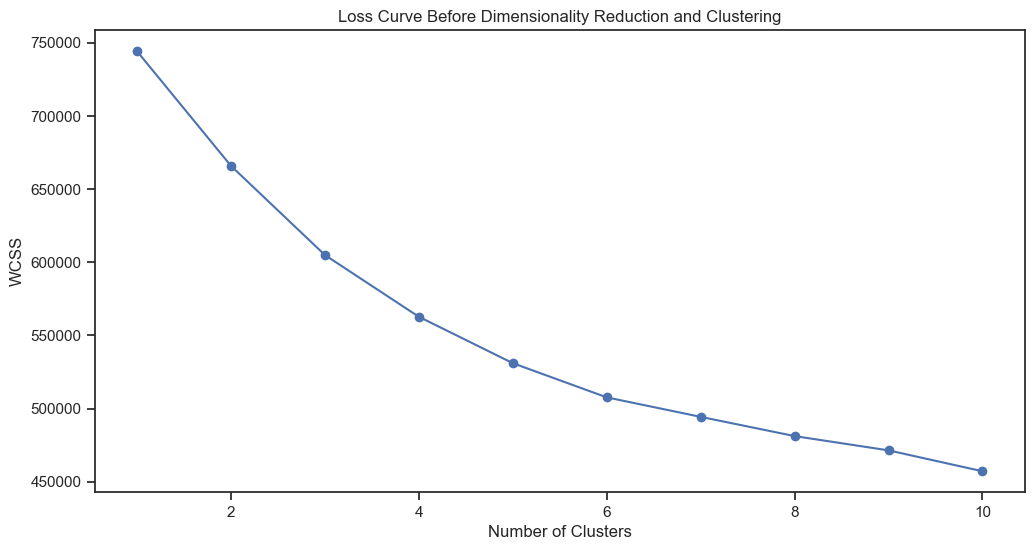

In [106]:
# Calculate the Within-Cluster Sum of Squares (WCSS) before clustering for different numbers of clusters
wcss_before = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss_before.append(kmeans.inertia_)

# Loss curve before dimensionality reduction and clustering
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss_before, marker='o')
plt.title('Loss Curve Before Dimensionality Reduction and Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


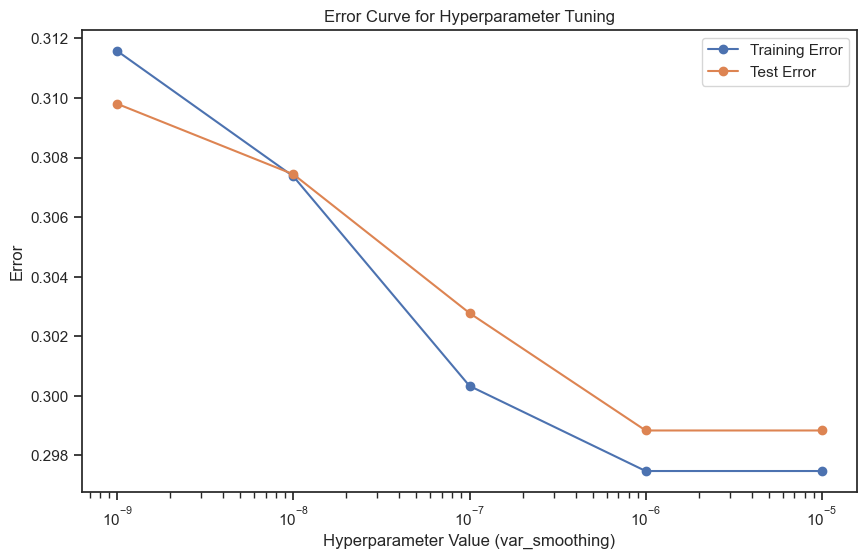

In [107]:
for param_value in param_range:
    gnb = GaussianNB(var_smoothing=param_value)
    gnb.fit(x_train, y_train)

    # Calculate error on the training set
    train_errors.append(1 - gnb.score(x_train, y_train))

    # Calculate error on the test set
    test_errors.append(1 - gnb.score(x_test, y_test))

# Plot the error curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_errors, label='Training Error', marker='o')
plt.plot(param_range, test_errors, label='Test Error', marker='o')

plt.title('Error Curve for Hyperparameter Tuning')
plt.xlabel('Hyperparameter Value (var_smoothing)')
plt.ylabel('Error')
plt.xscale('log')  # Use a logarithmic scale if the hyperparameter values are on a large scale
plt.legend()
plt.show()


Accuracy: 0.7012
Precision: 0.4916
Recall: 0.7012
F1 Score: 0.5780


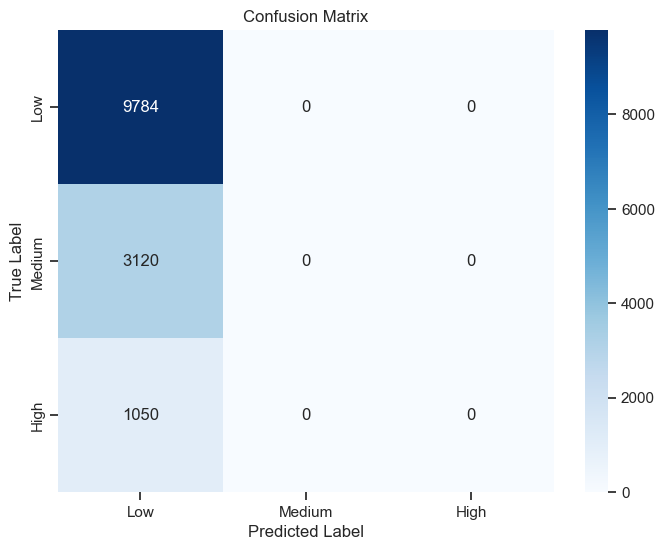

In [108]:
# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Principal Component Analysis

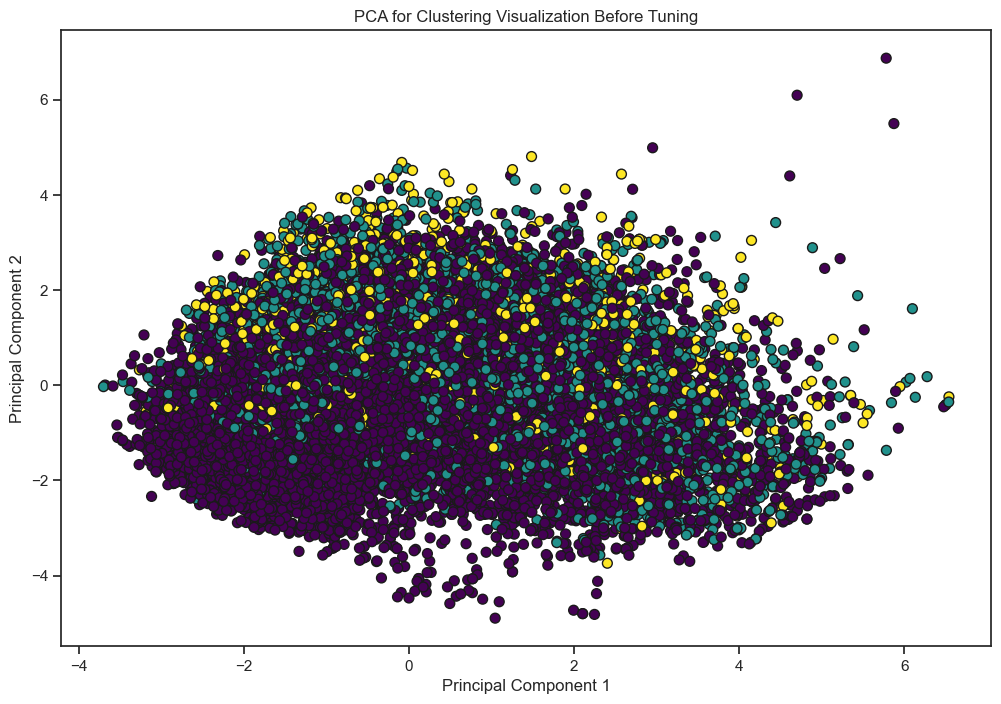

In [109]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)  # You can choose the number of components based on your preference
X_pca = pca.fit_transform(X_standardized)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA for Clustering Visualization Before Tuning')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

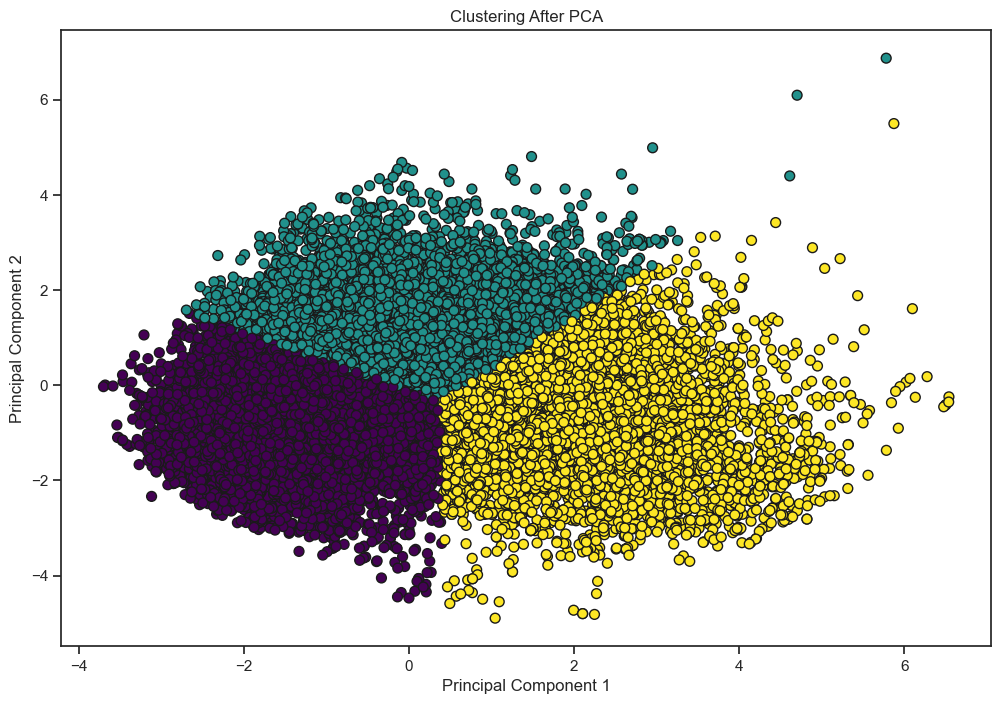

Silhouette Score: 0.35361499431623783
Cluster Centroids in Original Feature Space:
   bedrooms  longitude  manager_skill  building_id_transform  num_features  \
0 -0.452448   0.040050      -0.467168              -0.204742     -0.559024   
1  0.463866   0.535238       0.425567              -0.458991     -0.077295   
2  0.038494  -0.894340       0.122286               1.051511      1.053093   

   num_photos  num_description_words  combined_date_normalized  Sentiment  
0   -0.490951              -0.640376                 -0.046614  -0.335996  
1    0.355933               0.218686                  0.038877   0.301453  
2    0.269656               0.731382                  0.017745   0.095096  


In [110]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

centroids = pca.inverse_transform(kmeans.cluster_centers_)

print("Cluster Centroids in Original Feature Space:")
print(pd.DataFrame(centroids, columns=X.columns))


In [111]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=100)

gnb_pca = GaussianNB()

param_grid_pca = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_pca = GridSearchCV(estimator=gnb_pca, param_grid=param_grid_pca, cv=3, scoring='accuracy')
grid_search_pca.fit(x_train_pca, y_train_pca)
best_gnb_pca = grid_search_pca.best_estimator_

y_pred_after_tuning_pca = best_gnb_pca.predict(x_test_pca)
accuracy_after_tuning_pca = accuracy_score(y_test_pca, y_pred_after_tuning_pca)

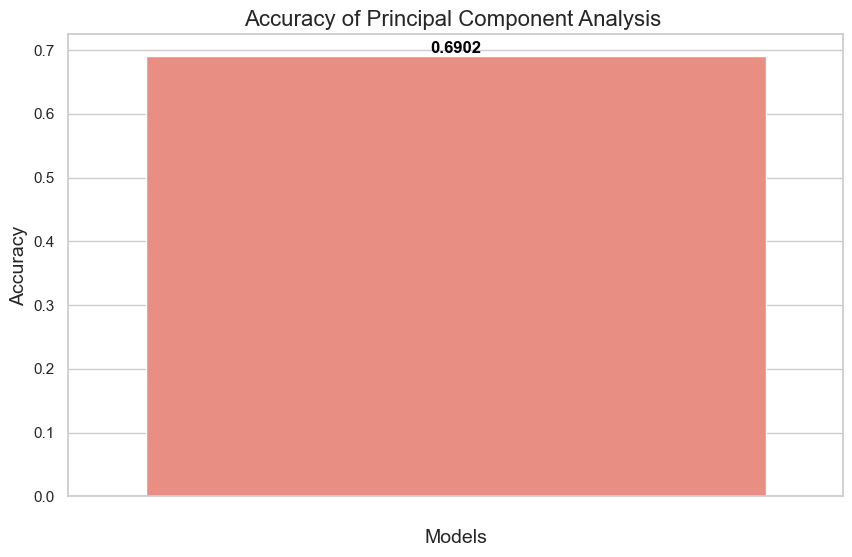

In [112]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=[' '], y=[accuracy_before_tuning], palette=['salmon'])

for bar, acc in zip(bar_plot.patches, [accuracy_before_tuning]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(acc, 4), ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Accuracy of Principal Component Analysis ', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()


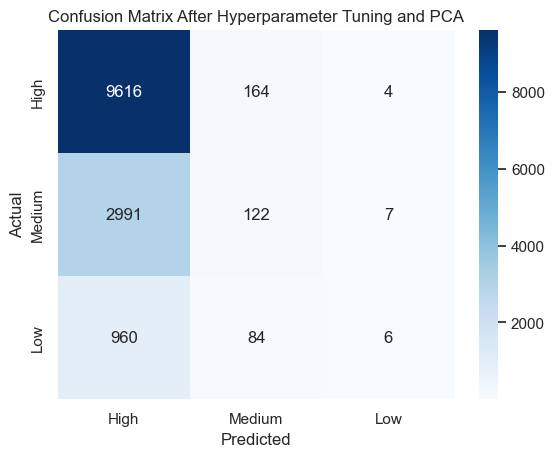

In [113]:
conf_matrix_after_tuning_pca = confusion_matrix(y_test_pca, y_pred_after_tuning_pca)
sns.heatmap(conf_matrix_after_tuning_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'])
plt.title('Confusion Matrix After Hyperparameter Tuning and PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
precision_after_tuning_pca = precision_score(y_test_pca, y_pred_after_tuning_pca, average='weighted')
recall_after_tuning_pca = recall_score(y_test_pca, y_pred_after_tuning_pca, average='weighted')
f1_score_after_tuning_pca = f1_score(y_test_pca, y_pred_after_tuning_pca, average='weighted')

print(f'Precision After Tuning and PCA: {precision_after_tuning_pca:.4f}')
print(f'Recall After Tuning and PCA: {recall_after_tuning_pca:.4f}')
print(f'F1 Score After Tuning and PCA: {f1_score_after_tuning_pca:.4f}')

Precision After Tuning and PCA: 0.5973
Recall After Tuning and PCA: 0.6983
F1 Score After Tuning and PCA: 0.5940


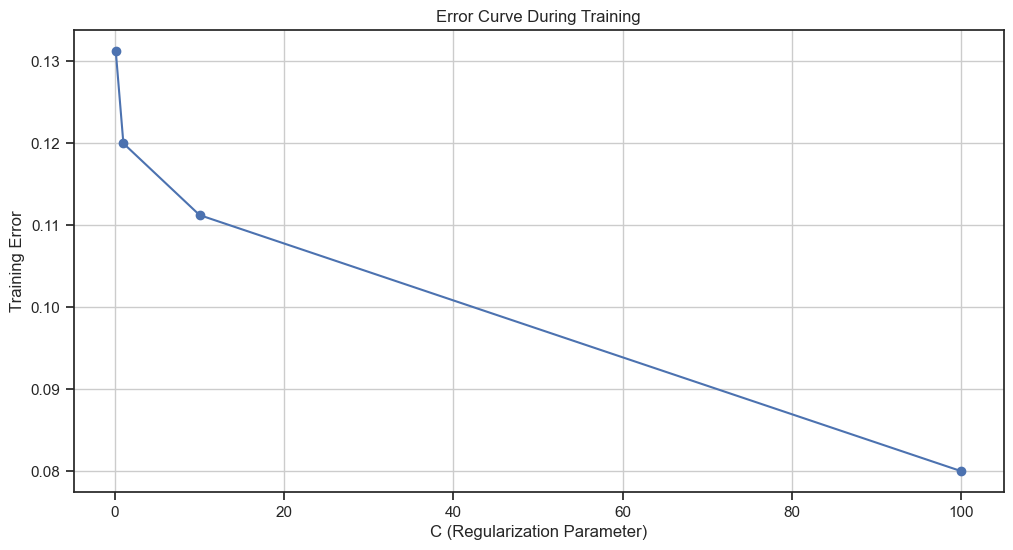

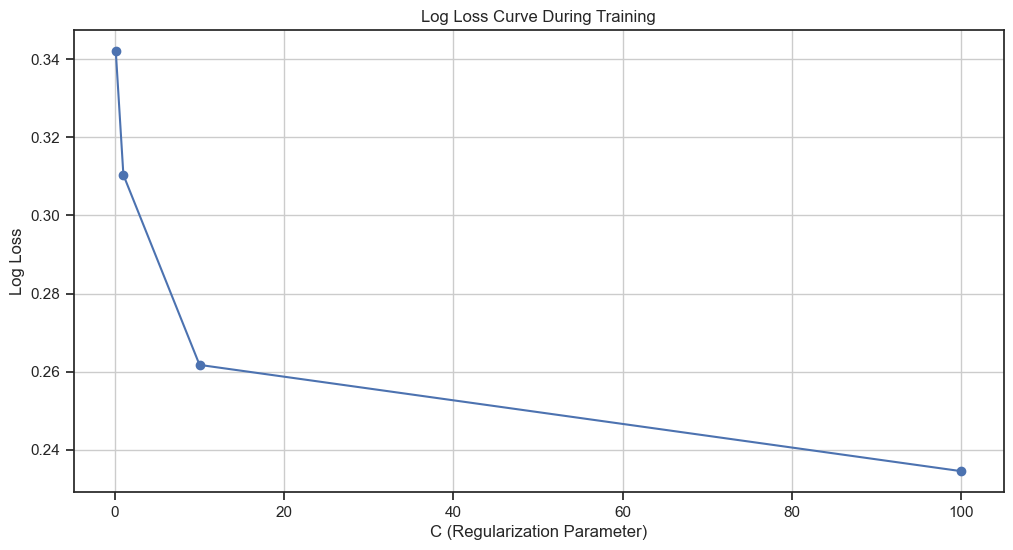

In [155]:
var_smoothing_values_pca = param_grid_pca['var_smoothing']
results_pca = grid_search_pca.cv_results_

train_mean_times_pca = results_pca['mean_fit_time']
train_std_times_pca = results_pca['std_fit_time']

val_mean_scores_pca = results_pca['mean_test_score']
val_std_scores_pca = results_pca['std_test_score']

plt.figure(figsize=(12, 6))
plt.errorbar(var_smoothing_values_pca, train_mean_times_pca, yerr=train_std_times_pca, label='Train', fmt='o-', color='red')
plt.errorbar(var_smoothing_values_pca, val_mean_scores_pca, yerr=val_std_scores_pca, label='Validation', fmt='o-', color='green')

plt.xscale('log') 
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning After PCA: Error Curve')
plt.legend()
plt.show()
log_loss_mean_scores_pca = -results_pca['mean_test_score']
log_loss_std_scores_pca = results_pca['std_test_score']

plt.figure(figsize=(12, 6))
plt.plot(var_smoothing_values_pca, log_loss_mean_scores_pca, 'o-', color='blue', label='Log Loss')

plt.fill_between(var_smoothing_values_pca, log_loss_mean_scores_pca - log_loss_std_scores_pca, log_loss_mean_scores_pca + log_loss_std_scores_pca, alpha=0.2, color='blue')

plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.xlabel('var_smoothing')
plt.ylabel('Log Loss')
plt.title('Hyperparameter Tuning After PCA: Log Loss Curve')
plt.legend()
plt.show()


# Ensemble Model

## Ensemble Modal with KNN MSE,Bayesian Ridge MSE, Gaussian NB MSE, Ensemble (KNN + Bayesian Ridge) MSE

In [117]:
from sklearn.naive_bayes import GaussianNB
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Encode the target variable
y_enc = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.71


In [118]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Assuming X_train_batch and X_test_batch are NumPy arrays
batch_size = 100

# Train the model on one batch
X_train_batch = X_train[:batch_size]
y_train_batch = y_train[:batch_size]
model.fit(X_train_batch, y_train_batch)

# Predict on the test batch
X_test_batch = X_test[:batch_size]
y_pred_batch, sigma_batch = model.predict(X_test_batch, return_std=True)

# Calculate Mean Squared Error
mse_batch = mean_squared_error(y_test[:batch_size], y_pred_batch)
print(f"Mean Squared Error : {mse_batch:.4f}")

Mean Squared Error : 0.3386


In [119]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.2554


In [120]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

# Train individual models
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = np.sqrt(mean_squared_error(y_test, knn_pred))

br_model = BayesianRidge()
br_model.fit(X_train, y_train)
br_pred = br_model.predict(X_test)
br_mse = np.sqrt(mean_squared_error(y_test, br_pred))

# Gaussian Naive Bayes does not have a predict_proba method
# Using the decision function to obtain confidence scores
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_confidence = gnb_model.predict_proba(X_test)
gnb_mse = np.sqrt(mean_squared_error(y_test, np.max(gnb_confidence, axis=1)))

# Determine weights based on performance (lower MSE gets higher weight)
total_mse_knn_br = knn_mse + br_mse
knn_weight = 1 - knn_mse / total_mse_knn_br
br_weight = 1 - br_mse / total_mse_knn_br

total_mse_gnb = gnb_mse
gnb_weight = 1 - gnb_mse / total_mse_gnb

# Create an ensemble model with weighted predictions for KNN and Bayesian Ridge
ensemble_model = VotingRegressor(estimators=[
    ('knn', knn_model),
    ('br', br_model)
], weights=[knn_weight, br_weight])

ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_mse = np.sqrt(mean_squared_error(y_test, ensemble_pred))

print(f"KNN MSE: {knn_mse:.4f}")
print(f"Bayesian Ridge MSE: {br_mse:.4f}")
print(f"Gaussian NB MSE: {gnb_mse:.4f}")
print(f"Ensemble (KNN + Bayesian Ridge) MSE: {ensemble_mse:.4f}")

KNN MSE: 0.5407
Bayesian Ridge MSE: 0.5053
Gaussian NB MSE: 0.7971
Ensemble (KNN + Bayesian Ridge) MSE: 0.5064


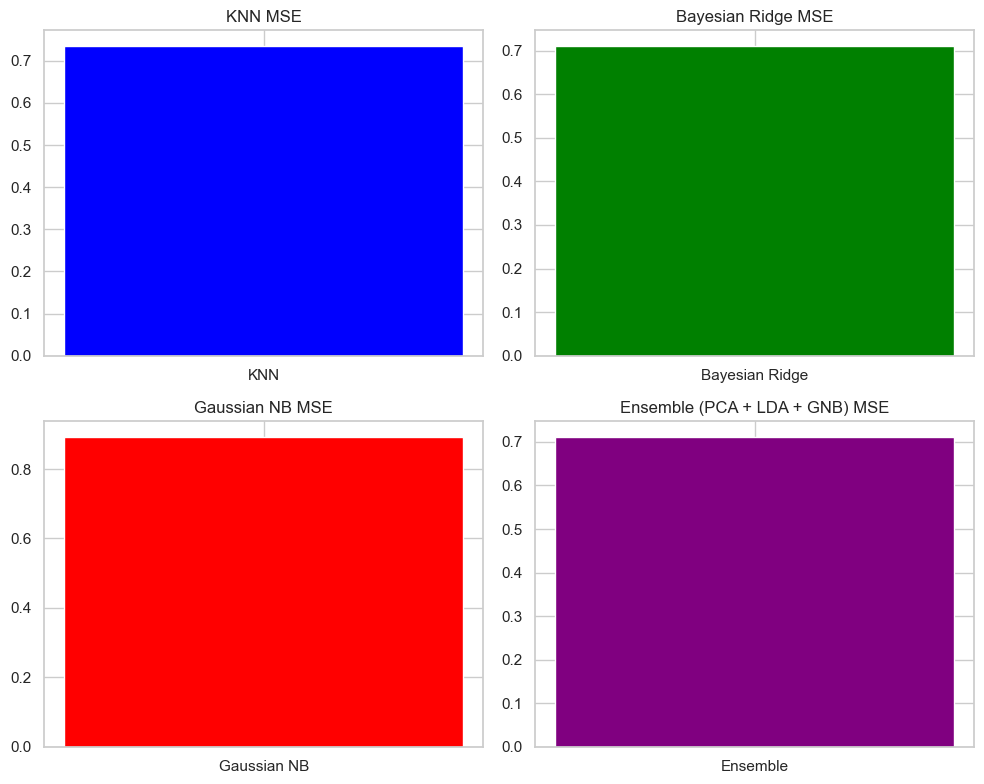

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].bar(['KNN'], [np.sqrt(knn_mse)], color='blue')
axes[0, 0].set_title('KNN MSE')

axes[0, 1].bar(['Bayesian Ridge'], [np.sqrt(br_mse)], color='green')
axes[0, 1].set_title('Bayesian Ridge MSE')

axes[1, 0].bar(['Gaussian NB'], [np.sqrt(gnb_mse)], color='red')
axes[1, 0].set_title('Gaussian NB MSE')

axes[1, 1].bar(['Ensemble'], [np.sqrt(ensemble_mse)], color='purple')
axes[1, 1].set_title('Ensemble (PCA + LDA + GNB) MSE')

plt.tight_layout()
plt.show()

## Ensemble Model with RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [122]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.base import clone

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Stacking
stacking_models = [('rf', rf_model), ('gb', gb_model)]
stacking_model = StackingClassifier(estimators=stacking_models, final_estimator=lr_model)

# Blending
blending_models = [rf_model, gb_model]
blending_predictions = []
for model in blending_models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    blending_predictions.append(predictions)

blending_predictions = np.array(blending_predictions).T
blender = LogisticRegression(random_state=42)
blender.fit(blending_predictions, y_test)

# Bagging
bagging_model = BaggingClassifier(base_estimator=clone(rf_model), n_estimators=10, random_state=42)

# Boosting
boosting_model = AdaBoostClassifier(base_estimator=clone(rf_model), n_estimators=50, random_state=42)

# Ensemble model
ensemble_models = [('stacking', stacking_model), ('blending', blender), ('bagging', bagging_model), ('boosting', boosting_model)]
ensemble_model = VotingClassifier(estimators=ensemble_models, voting='soft')

# Training and evaluation
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')


Ensemble Model Accuracy: 0.7476082983983661


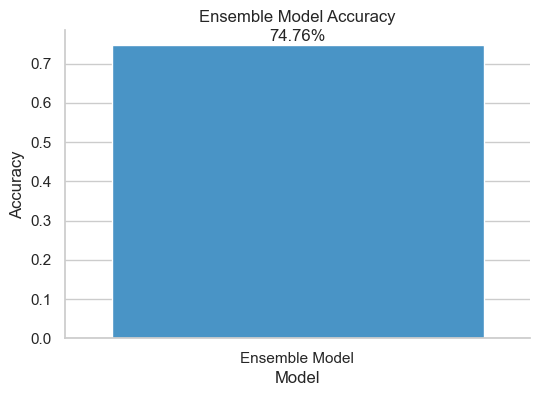

In [123]:

# Set the style to a white background with ticks
sns.set(style="whitegrid")

# Create a Seaborn bar plot with a default color
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=['Ensemble Model'], y=[accuracy], ax=ax, color='#3498db')  # Hex color for a blue shade

# Adding labels and title
ax.set(xlabel='Model', ylabel='Accuracy', title='Ensemble Model Accuracy')

# Display the accuracy value on top of the bar
ax.text(0, accuracy + 0.01, f'{accuracy:.2%}', ha='center')

# Remove the top and right spines for aesthetics
sns.despine(ax=ax, top=True, right=True)

# Show the plot
plt.show()

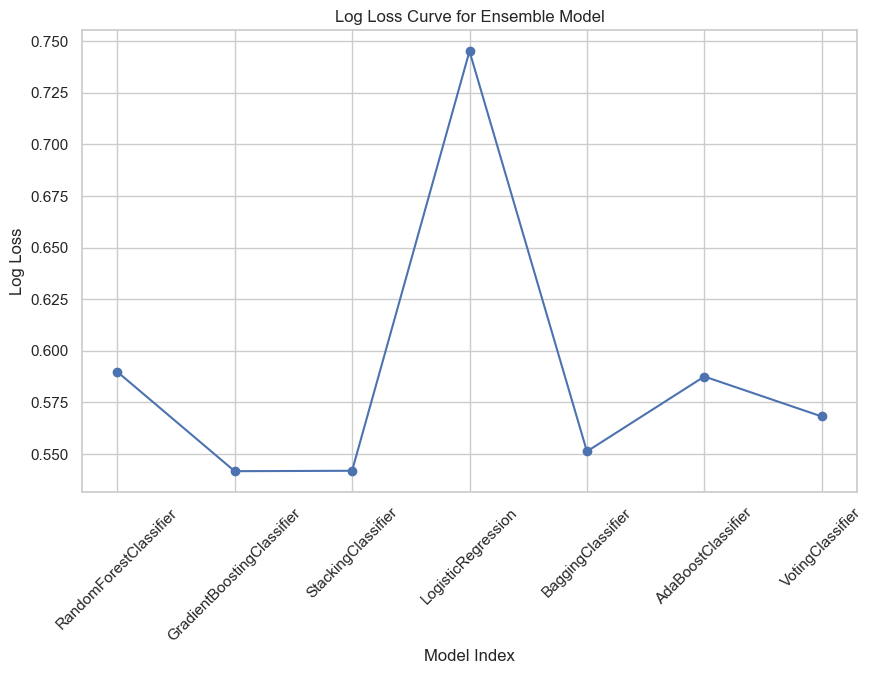

In [124]:
# Lists to store log loss values
log_loss_values = []

# Base models
models = [rf_model, gb_model, stacking_model, blender, bagging_model, boosting_model, ensemble_model]

for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)

    # Calculate log loss
    loss = log_loss(y_test, y_pred_proba)

    # Append log loss to the list
    log_loss_values.append(loss)

# Plotting the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(log_loss_values, marker='o', linestyle='-', color='b')
plt.title('Log Loss Curve for Ensemble Model')
plt.xlabel('Model Index')
plt.ylabel('Log Loss')
plt.xticks(range(len(models)), [type(model).__name__ for model in models], rotation=45)
plt.grid(True)
plt.show()

## Ensemble model with RandomForestClassifier + AdaBoostClassifier

In [221]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Bagging: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
rf_pred = rf_classifier.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Boosting: AdaBoost
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)
adaboost_pred = adaboost_classifier.predict(x_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")


Random Forest Accuracy: 0.6669772108356027
AdaBoost Accuracy: 0.7027375662892361


Random Forest Accuracy Before Tuning: 0.6669772108356027
AdaBoost Accuracy Before Tuning: 0.7027375662892361
Random Forest Accuracy After Tuning: 0.7040275189909704
AdaBoost Accuracy After Tuning: 0.7041708470689408


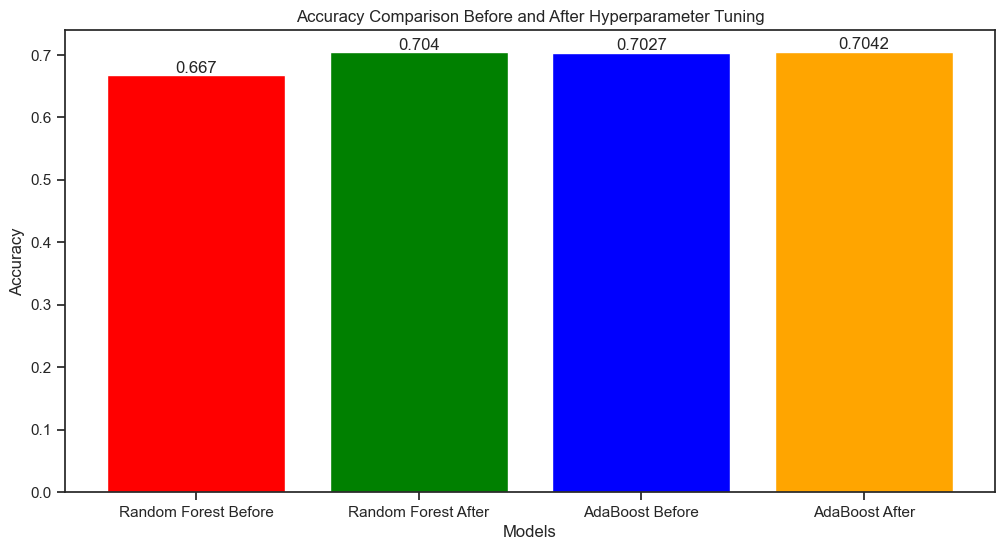

In [225]:
# Bagging: Random Forest
rf_classifier_before = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_before.fit(x_train, y_train)
rf_pred_before = rf_classifier_before.predict(x_test)
rf_accuracy_before = accuracy_score(y_test, rf_pred_before)
print(f"Random Forest Accuracy Before Tuning: {rf_accuracy_before}")

# Boosting: AdaBoost
adaboost_classifier_before = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier_before.fit(x_train, y_train)
adaboost_pred_before = adaboost_classifier_before.predict(x_test)
adaboost_accuracy_before = accuracy_score(y_test, adaboost_pred_before)
print(f"AdaBoost Accuracy Before Tuning: {adaboost_accuracy_before}")

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_classifier_after = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_classifier_after, param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(x_train, y_train)
rf_pred_after = rf_grid_search.predict(x_test)
rf_accuracy_after = accuracy_score(y_test, rf_pred_after)
print(f"Random Forest Accuracy After Tuning: {rf_accuracy_after}")

# Hyperparameter tuning for AdaBoost
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

adaboost_classifier_after = AdaBoostClassifier(random_state=42)
adaboost_grid_search = GridSearchCV(adaboost_classifier_after, param_grid=adaboost_param_grid, cv=3, n_jobs=-1)
adaboost_grid_search.fit(x_train, y_train)
adaboost_pred_after = adaboost_grid_search.predict(x_test)
adaboost_accuracy_after = accuracy_score(y_test, adaboost_pred_after)
print(f"AdaBoost Accuracy After Tuning: {adaboost_accuracy_after}")

# Visualize the accuracy comparison
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(['Random Forest Before', 'Random Forest After', 'AdaBoost Before', 'AdaBoost After'],
                   [rf_accuracy_before, rf_accuracy_after, adaboost_accuracy_before, adaboost_accuracy_after],
                   color=['red', 'green', 'blue', 'orange'])

# Display accuracy values on the graph
for bar, acc in zip(bar_plot, [rf_accuracy_before, rf_accuracy_after, adaboost_accuracy_before, adaboost_accuracy_after]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(acc, 4), ha='center', va='bottom')

plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

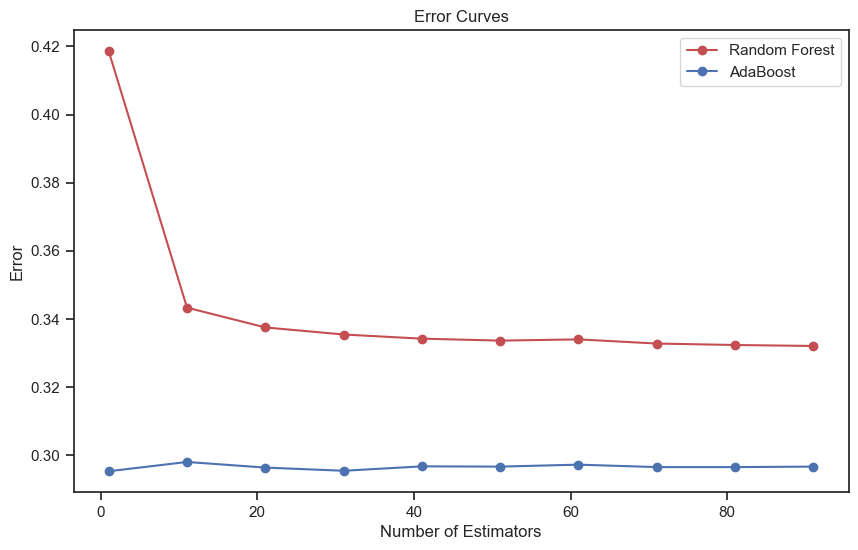

In [230]:
import numpy as np

# Placeholder for the errors
rf_errors = []
adaboost_errors = []

# Range of 'n_estimators' values to explore
n_estimators_range = np.arange(1, 101, 10)

for n_estimators in n_estimators_range:
    # Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(x_train, y_train)
    rf_pred = rf_classifier.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_error = 1 - rf_accuracy  # Error is 1 - accuracy
    rf_errors.append(rf_error)

    # Train the AdaBoost classifier
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost_classifier.fit(x_train, y_train)
    adaboost_pred = adaboost_classifier.predict(x_test)
    adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
    adaboost_error = 1 - adaboost_accuracy  # Error is 1 - accuracy
    adaboost_errors.append(adaboost_error)

# Plot the error curves
plt.figure(figsize=(10, 6))

plt.plot(n_estimators_range, rf_errors, 'o-', color='r', label='Random Forest')
plt.plot(n_estimators_range, adaboost_errors, 'o-', color='b', label='AdaBoost')

plt.title('Error Curves')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()

plt.show()


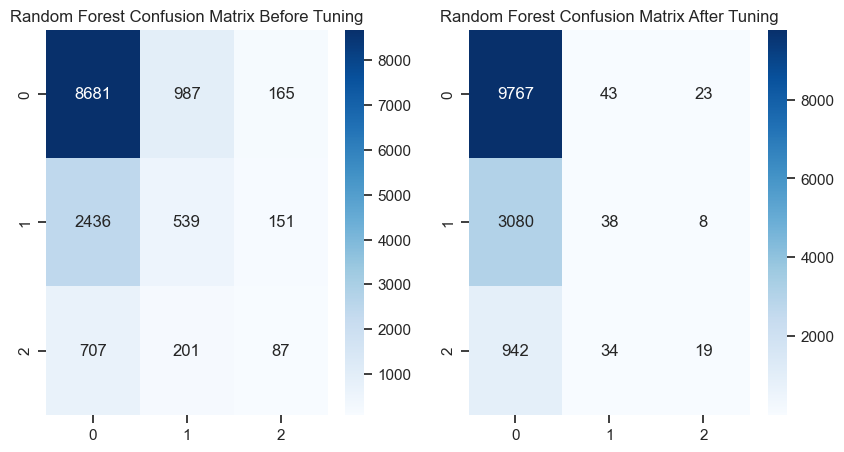

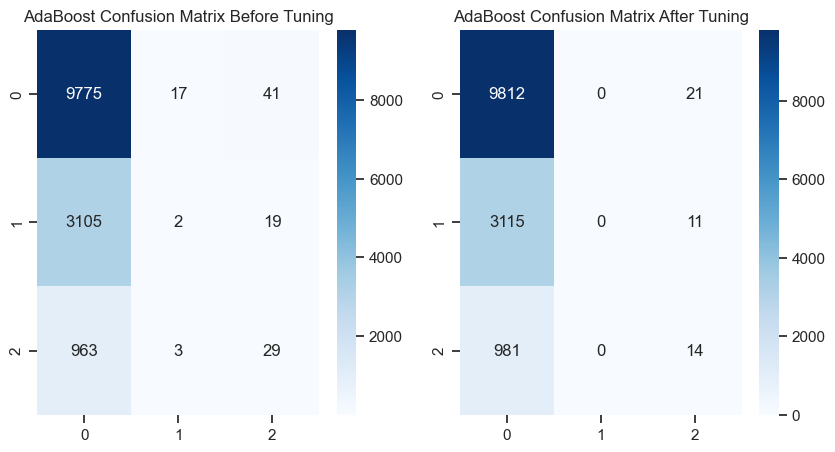

In [227]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# For Random Forest
rf_cm_before = confusion_matrix(y_test, rf_pred_before)
rf_cm_after = confusion_matrix(y_test, rf_pred_after)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm_before, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix Before Tuning')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm_after, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix After Tuning')

plt.show()

# For AdaBoost
adaboost_cm_before = confusion_matrix(y_test, adaboost_pred_before)
adaboost_cm_after = confusion_matrix(y_test, adaboost_pred_after)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(adaboost_cm_before, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix Before Tuning')

plt.subplot(1, 2, 2)
sns.heatmap(adaboost_cm_after, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix After Tuning')

plt.show()
